In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("../data/DK-DK2.csv")
df

datetime   timestamp zone_name  carbon_intensity_avg  \
0      2014-12-11 23:00:00+00:00  1418338800    DK-DK2                   NaN   
1      2014-12-12 00:00:00+00:00  1418342400    DK-DK2                   NaN   
2      2014-12-12 01:00:00+00:00  1418346000    DK-DK2                   NaN   
3      2014-12-12 02:00:00+00:00  1418349600    DK-DK2                   NaN   
4      2014-12-12 03:00:00+00:00  1418353200    DK-DK2                   NaN   
...                          ...         ...       ...                   ...   
41927  2019-09-26 04:00:00+00:00  1569470400    DK-DK2            156.987260   
41928  2019-09-26 05:00:00+00:00  1569474000    DK-DK2            219.305322   
41929  2019-09-26 06:00:00+00:00  1569477600    DK-DK2            227.887112   
41930  2019-09-26 07:00:00+00:00  1569481200    DK-DK2            219.086126   
41931  2019-09-26 08:00:00+00:00  1569484800    DK-DK2                   NaN   

       carbon_intensity_production_avg  carbon_intensity_discharge_avg  \
0                                  NaN                             NaN   
1                                  NaN                             NaN   
2                                  NaN                             NaN   
3                                  NaN                             NaN   
4                                  NaN                             NaN   
...                                ...                             ...   
41927                       223.801546                             NaN   
41928                       221.593838                             NaN   
41929                       226.866953                             NaN   
41930                       226.866953                             NaN   
41931                              NaN                             NaN   

       carbon_intensity_import_avg  carbon_rate_avg  total_production_avg  \
0                              NaN              NaN                   NaN   
1                              NaN              NaN                   NaN   
2                              NaN              NaN                   NaN   
3                              NaN              NaN                   NaN   
4                              NaN              NaN                   NaN   
...                            ...              ...                   ...   
41927                   133.880082     2.370351e+08                 388.0   
41928                   218.662122     3.568558e+08                 357.0   
41929                   228.262772     3.945843e+08                 466.0   
41930                   216.019129     3.611021e+08                 466.0   
41931                   231.608140              NaN                   NaN   

       total_storage_avg  ...  latest_forecasted_wind_y_avg  \
0                    NaN  ...                           NaN   
1                    NaN  ...                           NaN   
2                    NaN  ...                           NaN   
3                    NaN  ...                           NaN   
4                    NaN  ...                           NaN   
...                  ...  ...                           ...   
41927                NaN  ...                      1.807466   
41928                NaN  ...                      2.149387   
41929                NaN  ...                      2.543895   
41930                NaN  ...                      3.263603   
41931                NaN  ...                      3.665548   

       latest_forecasted_price_avg  latest_forecasted_production_avg  \
0                            16.73                               NaN   
1                            16.21                               NaN   
2                            13.88                               NaN   
3                            15.09                               NaN   
4                            24.03                               NaN   
...                            ...                          

In [3]:
df.dtypes.head(60)

datetime                                      object
timestamp                                      int64
zone_name                                     object
carbon_intensity_avg                         float64
carbon_intensity_production_avg              float64
carbon_intensity_discharge_avg               float64
carbon_intensity_import_avg                  float64
carbon_rate_avg                              float64
total_production_avg                         float64
total_storage_avg                            float64
total_discharge_avg                          float64
total_import_avg                             float64
total_export_avg                             float64
total_consumption_avg                        float64
production_sources                            object
power_origin_percent_fossil_avg              float64
power_origin_percent_renewable_avg           float64
power_production_biomass_avg                 float64
power_production_coal_avg                    f

In [4]:
# drop timestamp column
df.drop(columns='timestamp', inplace=True)

In [5]:
# convert the datetime datatype
df['datetime'] = pd.to_datetime(df['datetime'])
df.sort_values('datetime', inplace=True)

In [6]:
# extract datetime fetures
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek

In [7]:
## missing values
# drop all the columns with all missing values
df.dropna(axis=1, how='all', inplace=True)

# drop all the rows which only has datetime 
df.dropna(axis=0, thresh=57, inplace=True)

In [8]:
# drop production_sources since it only has one category
df.drop('production_sources', axis=1, inplace=True)

In [9]:
numerical_features = [
    'carbon_intensity_production_avg', 'carbon_intensity_import_avg',
    'carbon_rate_avg', 'total_production_avg', 'total_import_avg',
    'total_export_avg', 'total_consumption_avg', 'power_origin_percent_fossil_avg',
    'power_origin_percent_renewable_avg', 'power_production_biomass_avg',
    'power_production_coal_avg', 'power_production_gas_avg',
    'power_production_oil_avg', 'power_production_solar_avg',
    'power_production_wind_avg', 'power_consumption_biomass_avg',
    'power_consumption_coal_avg', 'power_consumption_gas_avg',
    'power_consumption_hydro_avg', 'power_consumption_nuclear_avg',
    'power_consumption_oil_avg', 'power_consumption_solar_avg',
    'power_consumption_wind_avg', 'power_consumption_geothermal_avg',
    'power_consumption_unknown_avg', 'power_consumption_hydro_discharge_avg',
    'carbon_origin_percent_biomass_avg', 'carbon_origin_percent_coal_avg',
    'carbon_origin_percent_gas_avg', 'carbon_origin_percent_hydro_avg',
    'carbon_origin_percent_nuclear_avg', 'carbon_origin_percent_oil_avg',
    'carbon_origin_percent_solar_avg', 'carbon_origin_percent_wind_avg',
    'carbon_origin_percent_geothermal_avg', 'carbon_origin_percent_unknown_avg',
    'carbon_origin_percent_hydro_discharge_avg', 'power_net_import_DE_avg',
    'power_net_import_DK-DK1_avg', 'power_net_import_SE_avg',
    'latest_forecasted_dewpoint_avg', 'latest_forecasted_precipitation_avg',
    'latest_forecasted_solar_avg', 'latest_forecasted_temperature_avg',
    'latest_forecasted_wind_x_avg', 'latest_forecasted_wind_y_avg',
    'latest_forecasted_price_avg', 'latest_forecasted_production_avg',
    'latest_forecasted_consumption_avg', 'latest_forecasted_power_net_import_DE_avg',
    'latest_forecasted_power_net_import_DK-DK1_avg',
    'latest_forecasted_power_net_import_SE-SE4_avg',
    'latest_forecasted_production_solar_avg',
    'latest_forecasted_production_wind_avg', 'year', 'month', 'day', 'hour', 'dayofweek'
]

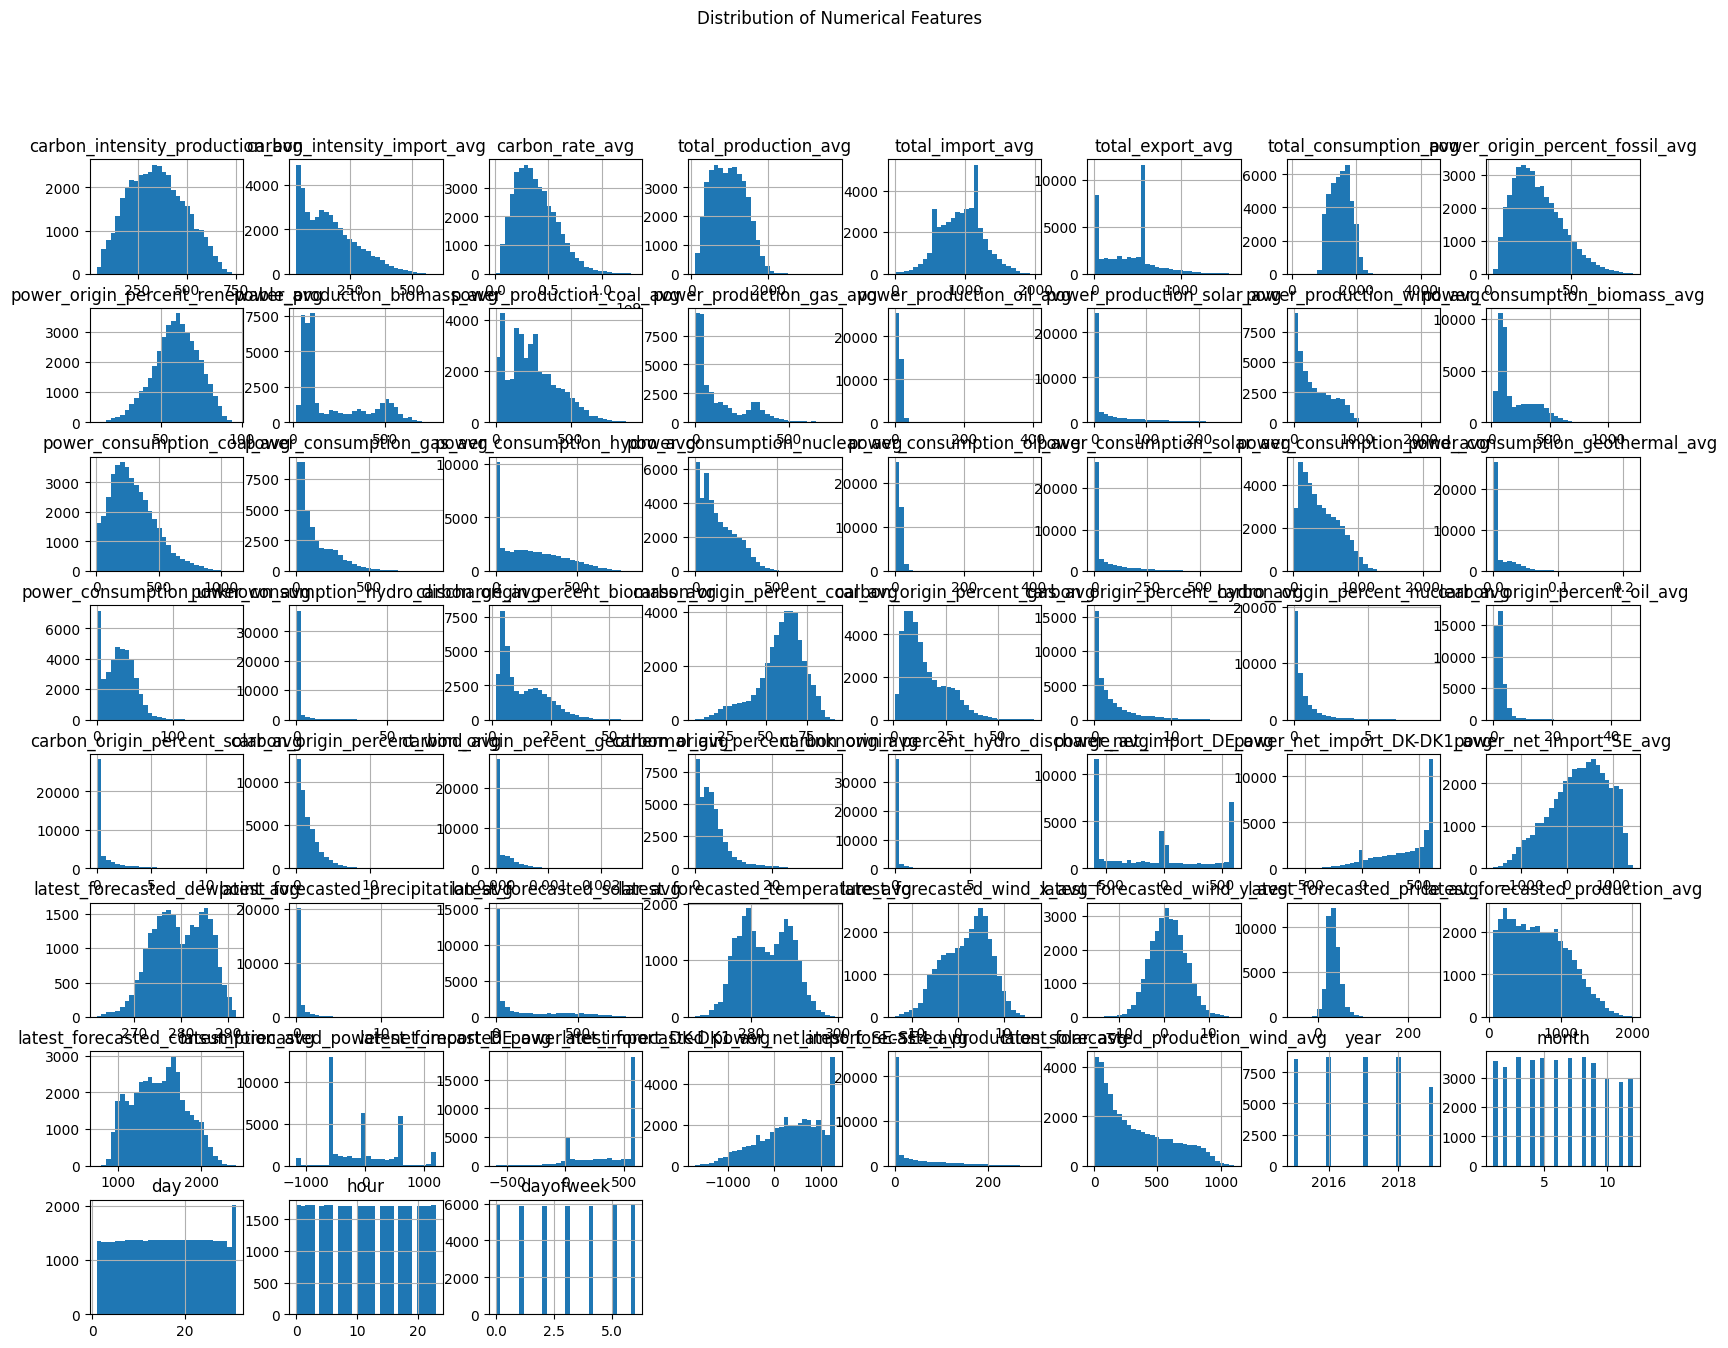

In [10]:
# Plot histograms
df[numerical_features].hist(bins=30, figsize=(20, 15))
plt.suptitle('Distribution of Numerical Features')
plt.show()

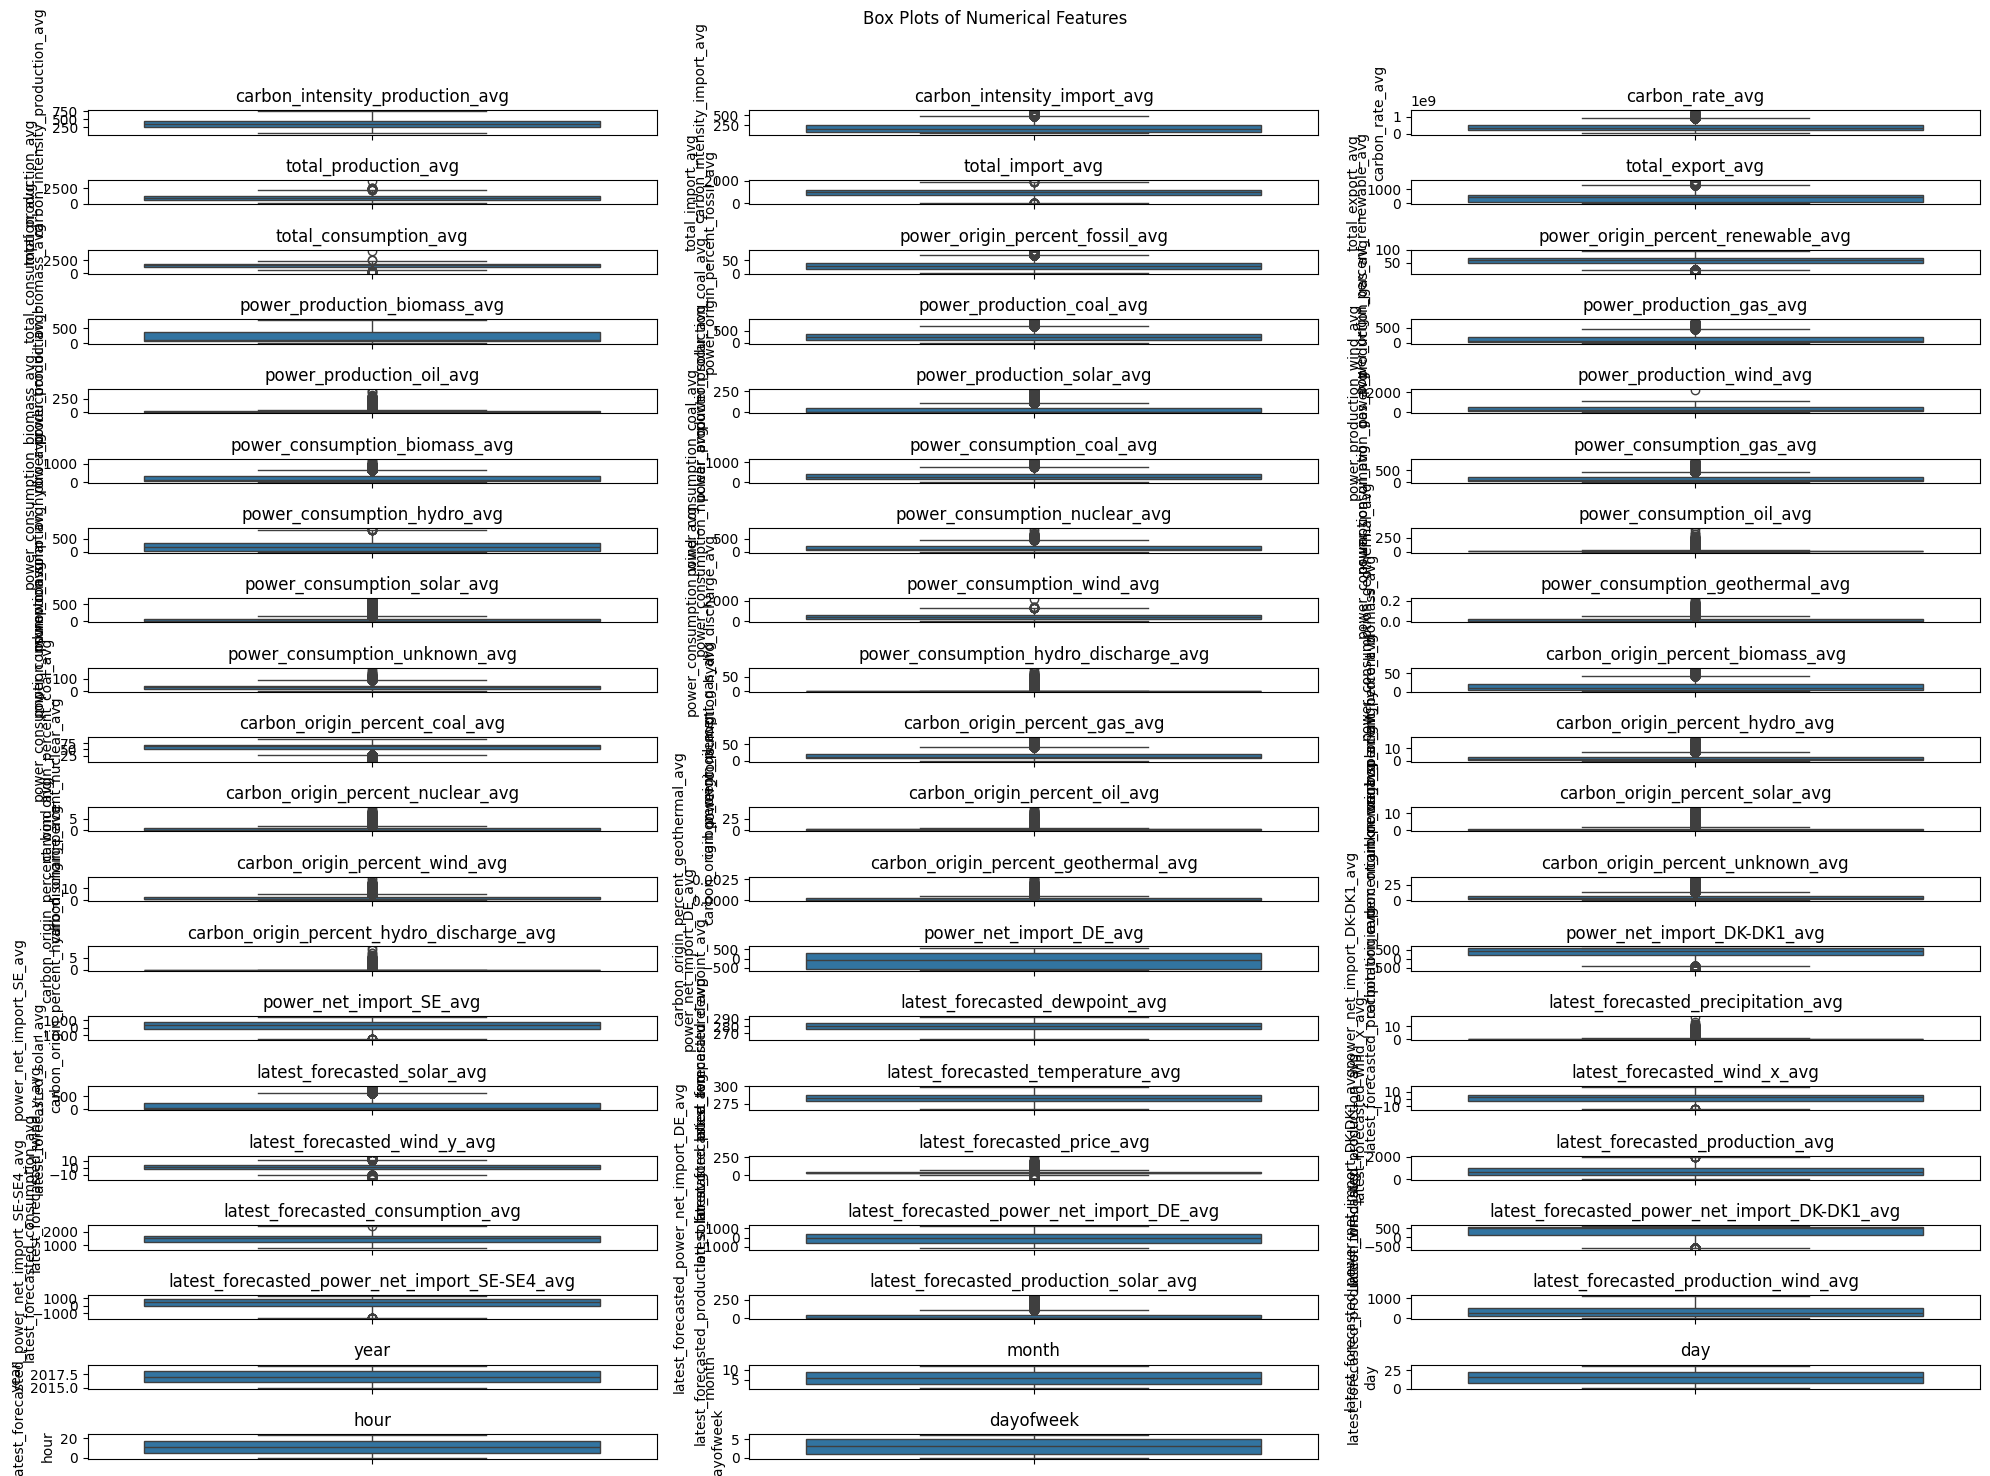

In [11]:
# Plot box plots
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features) // 3 + 1, 3, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.suptitle('Box Plots of Numerical Features')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

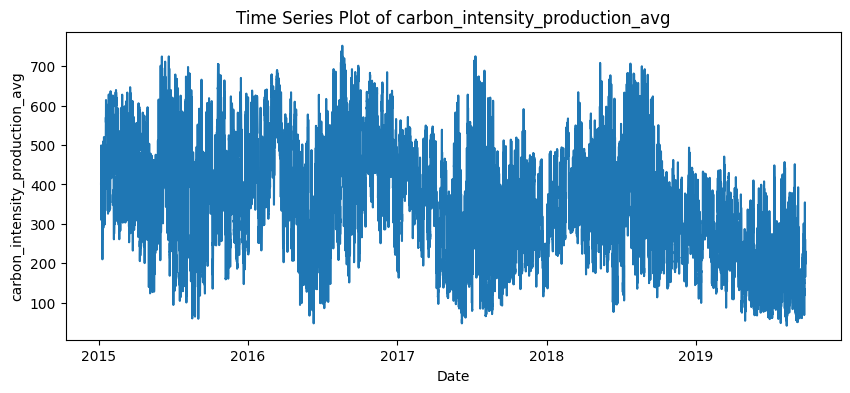

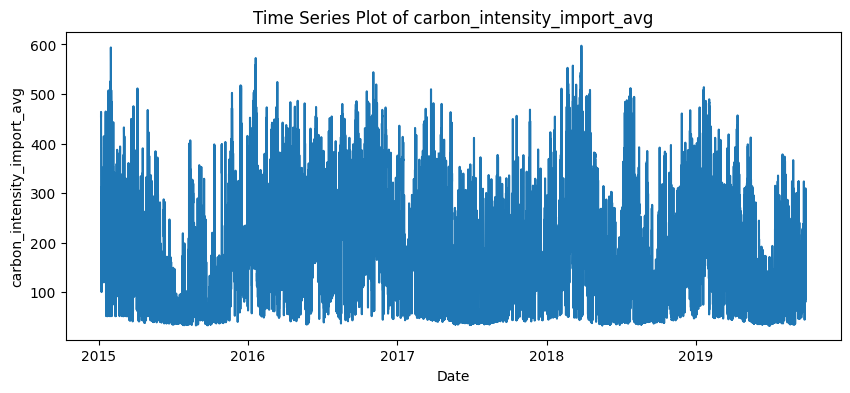

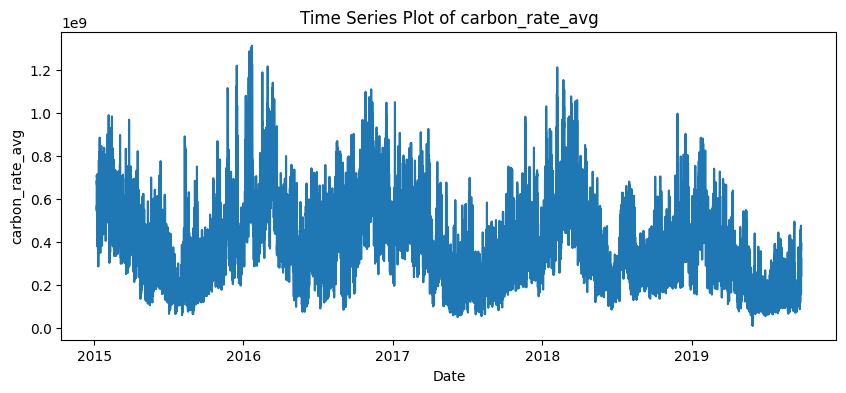

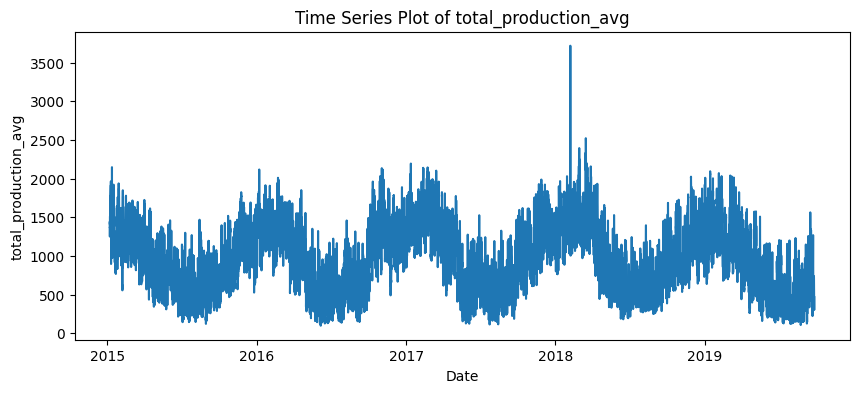

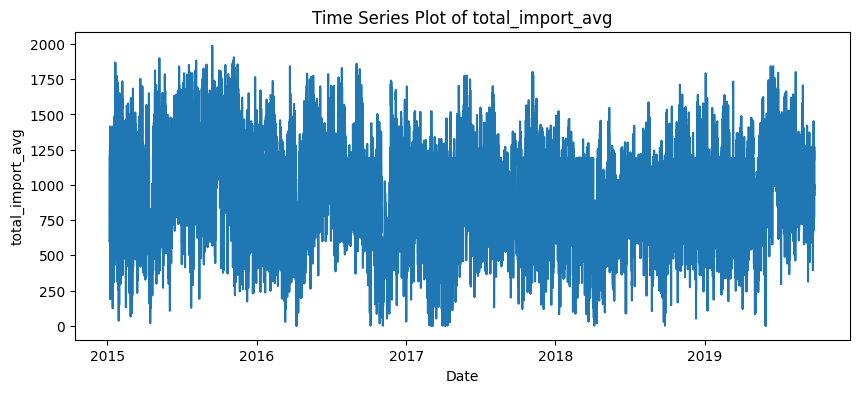

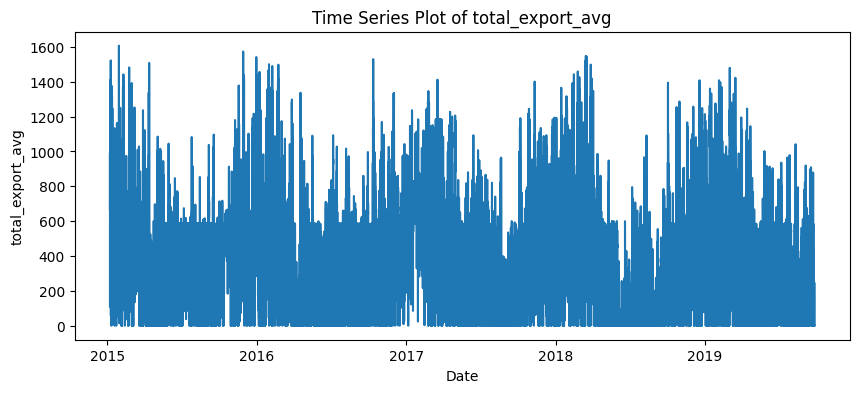

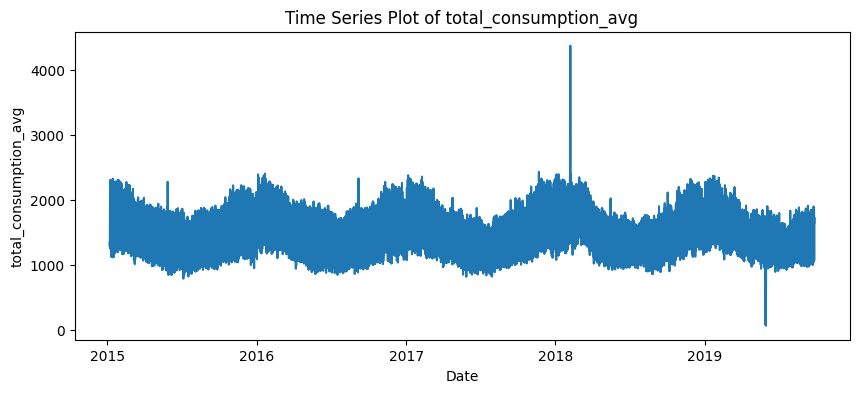

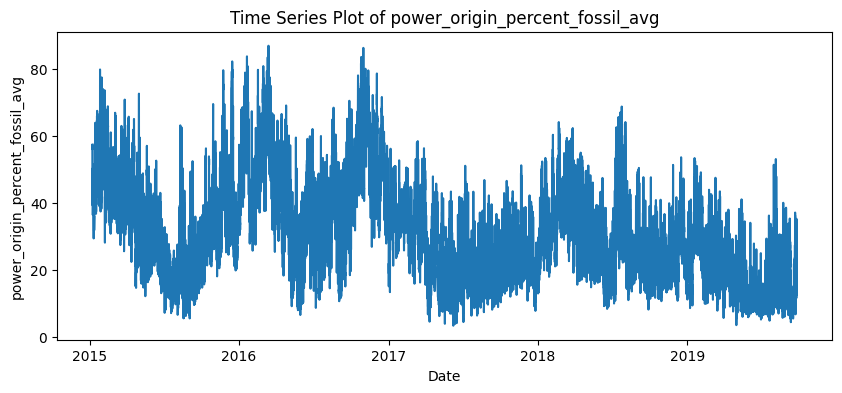

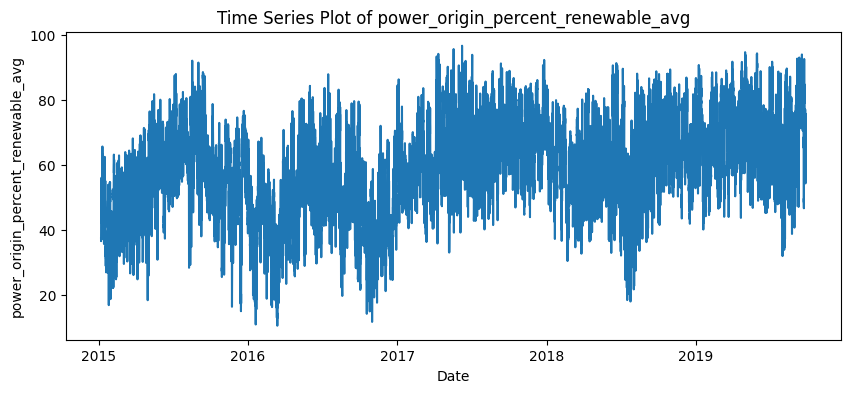

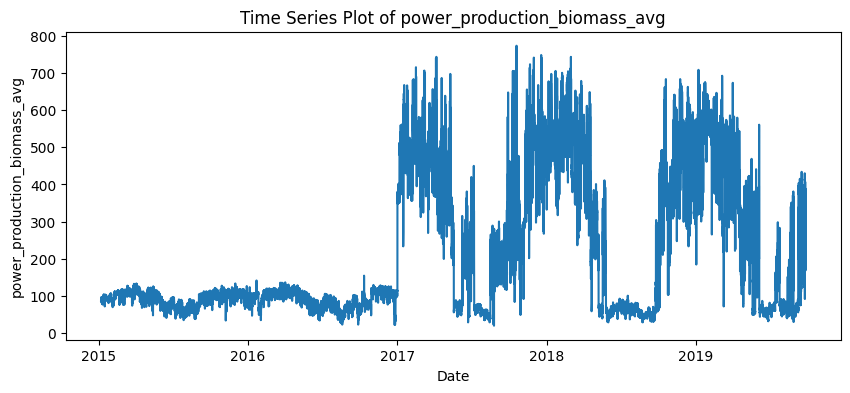

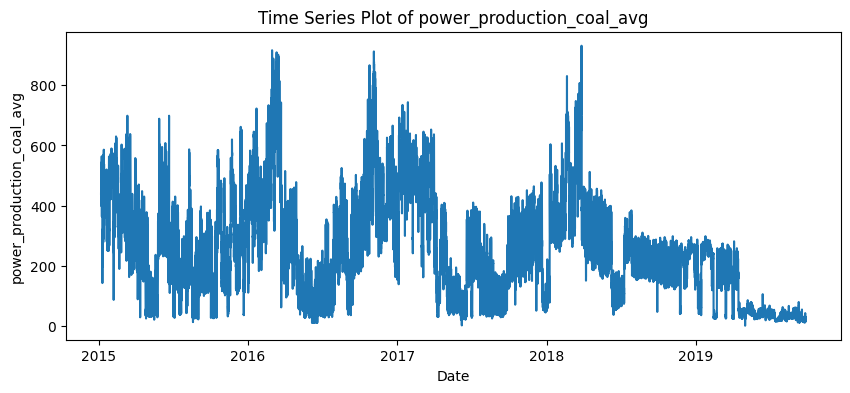

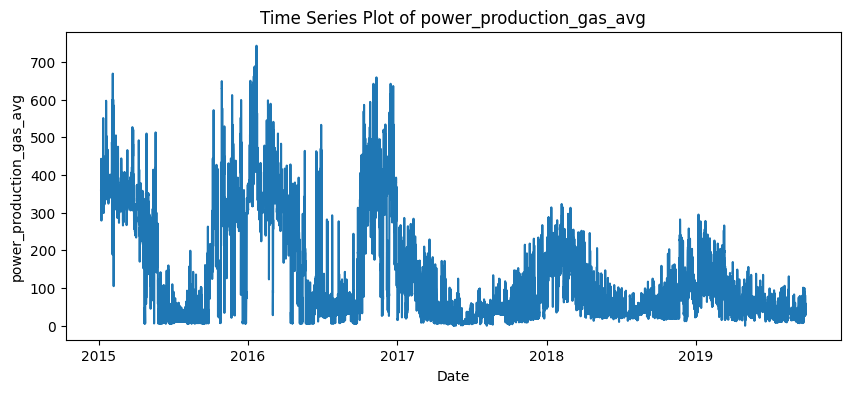

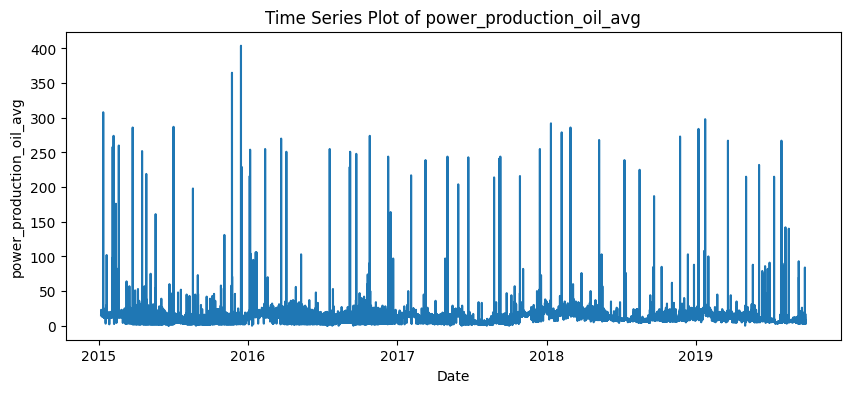

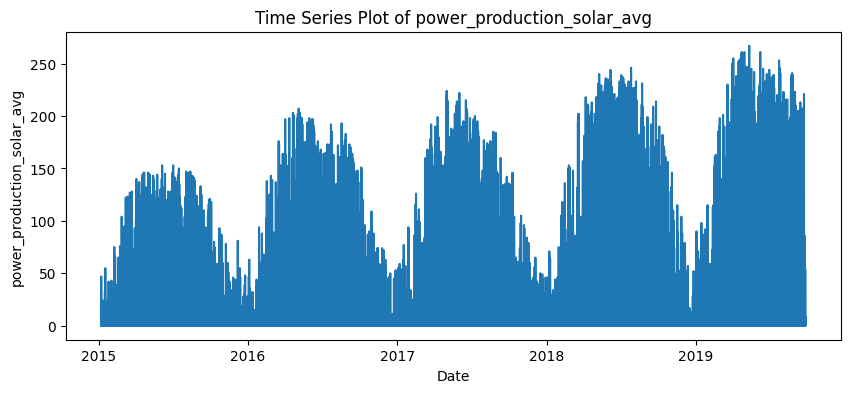

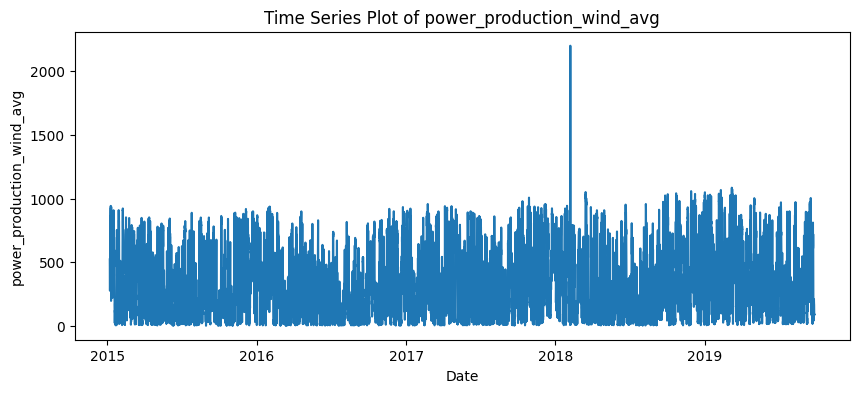

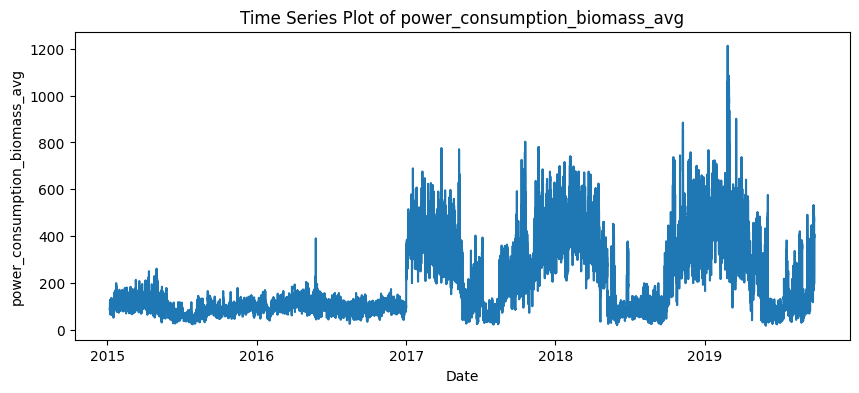

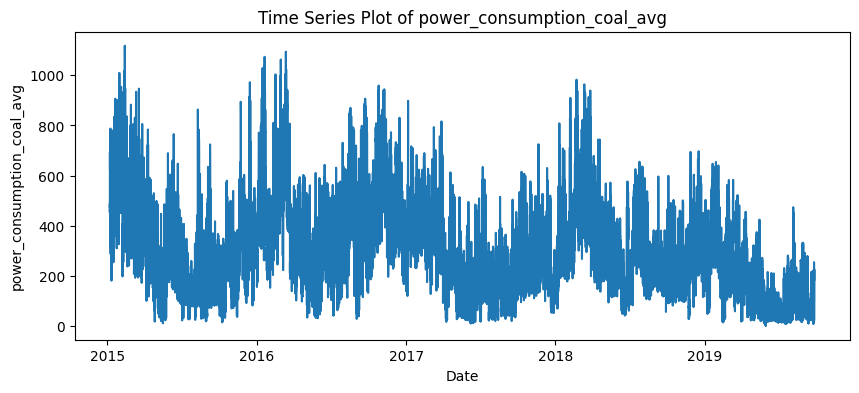

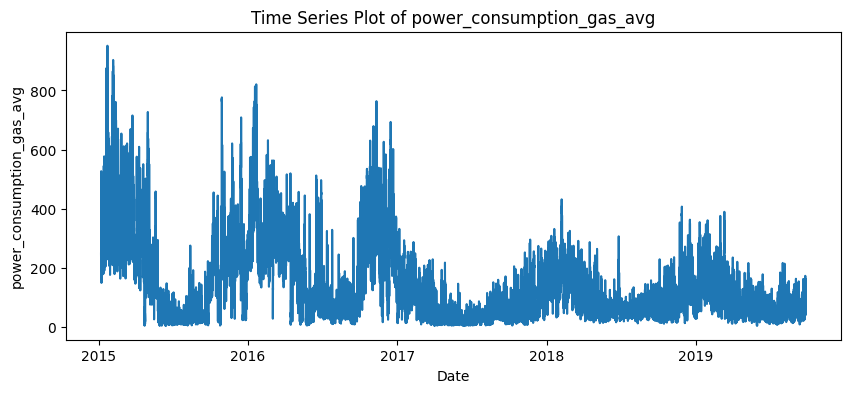

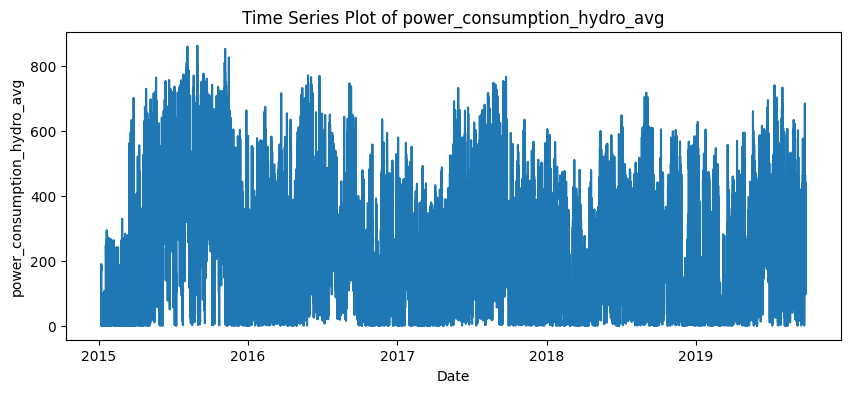

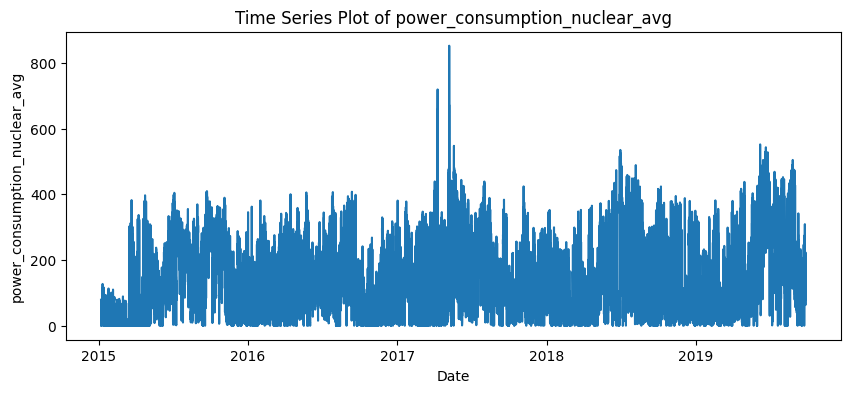

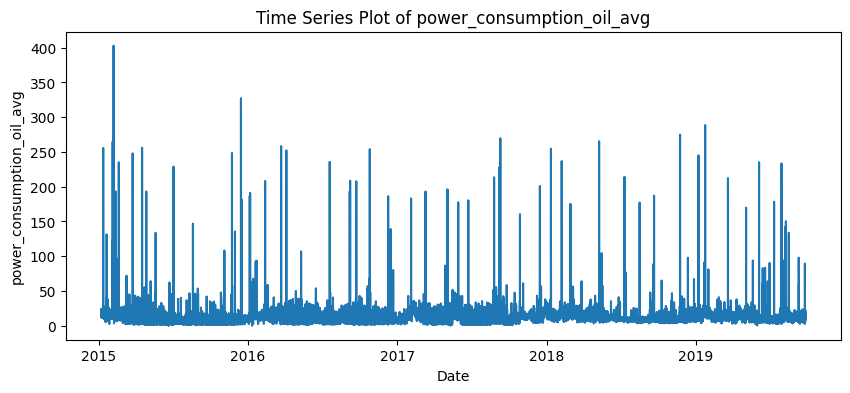

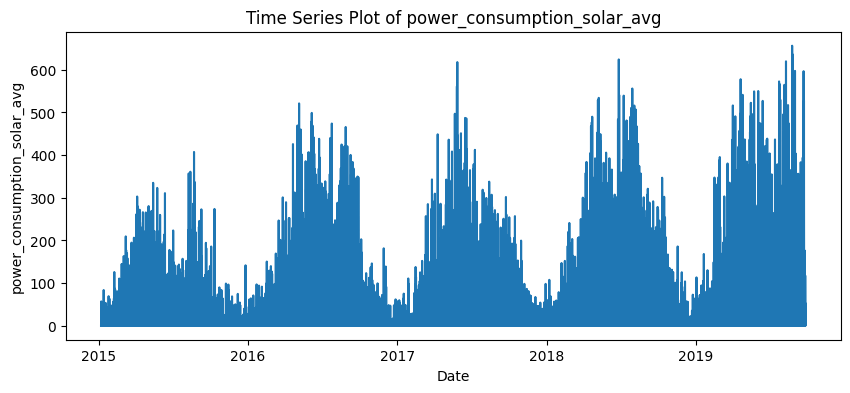

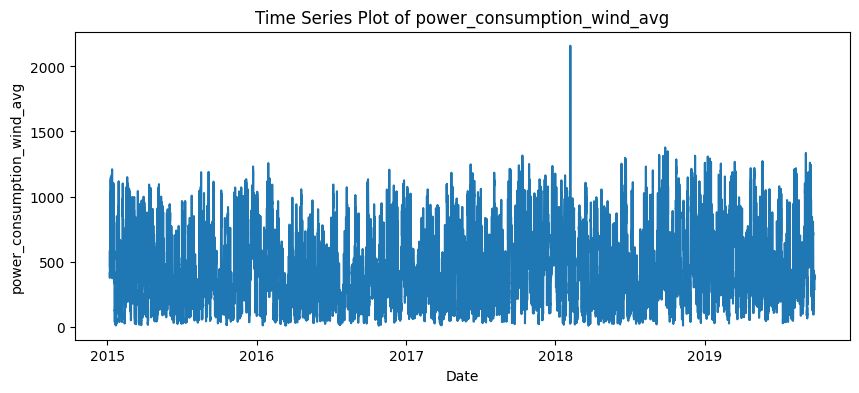

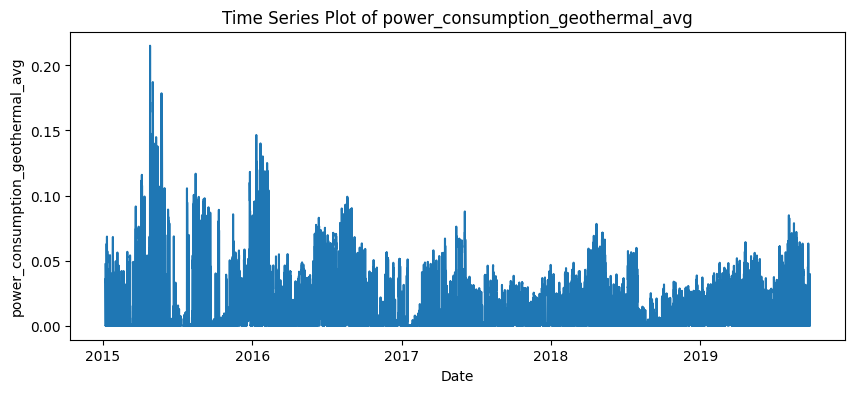

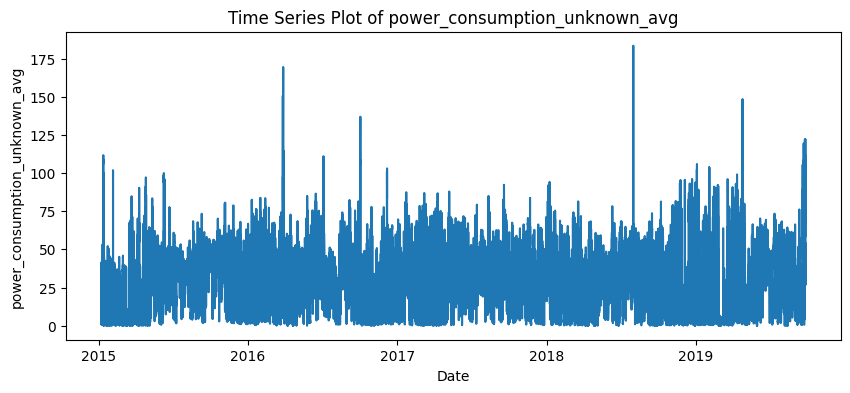

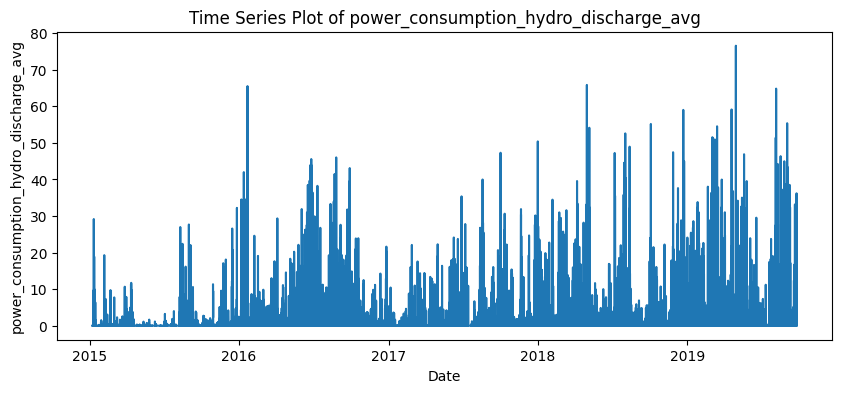

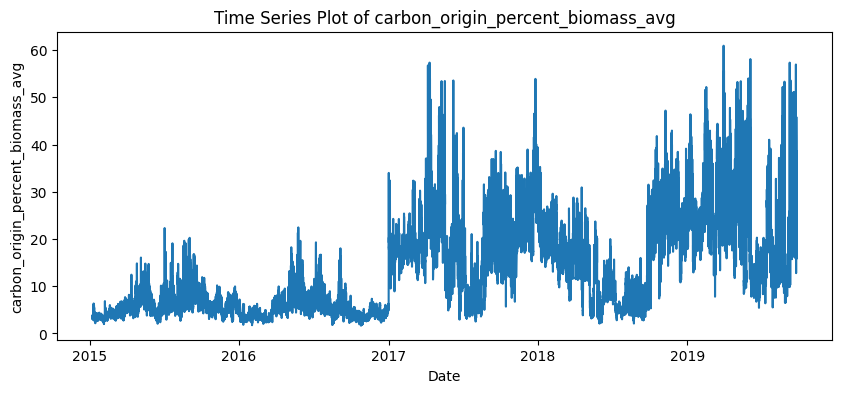

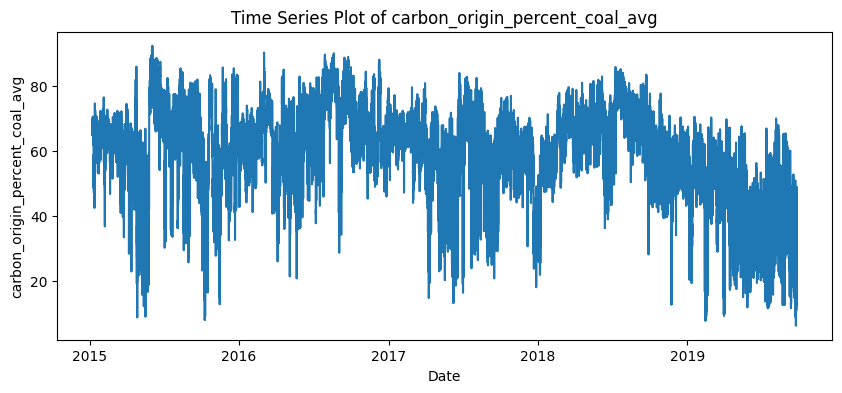

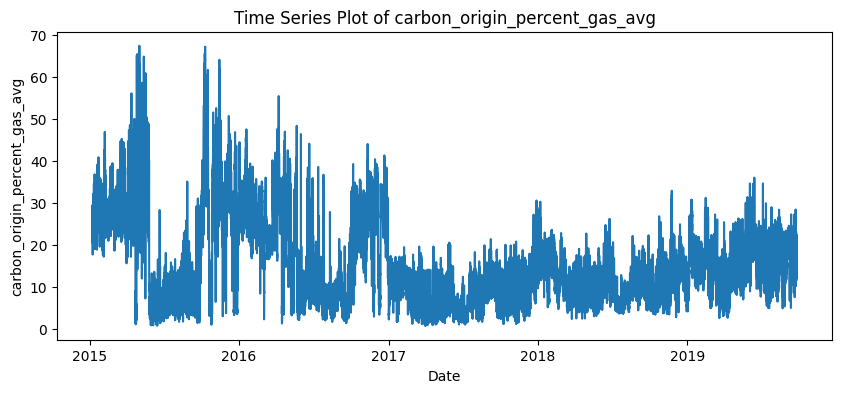

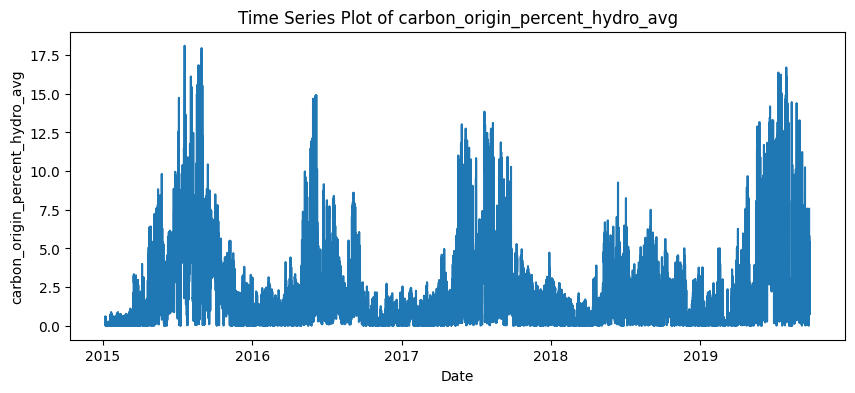

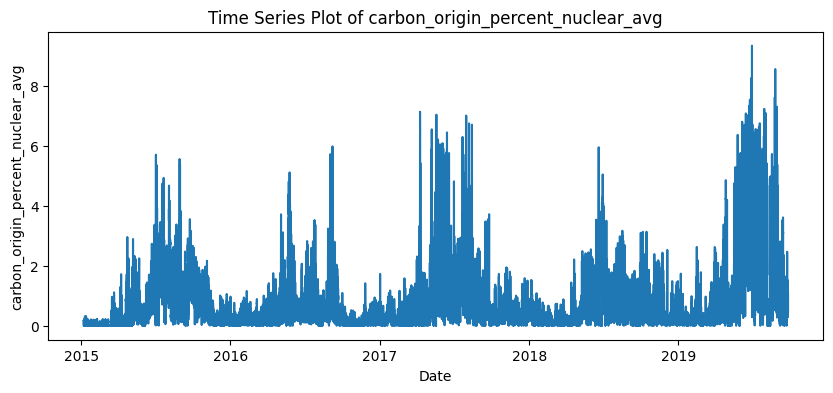

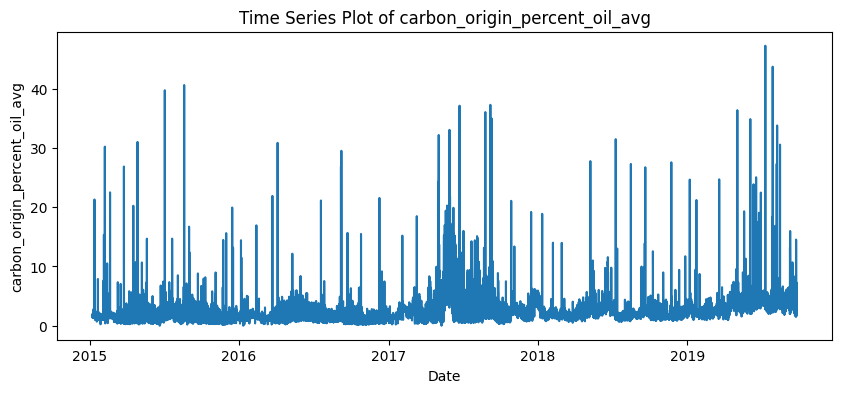

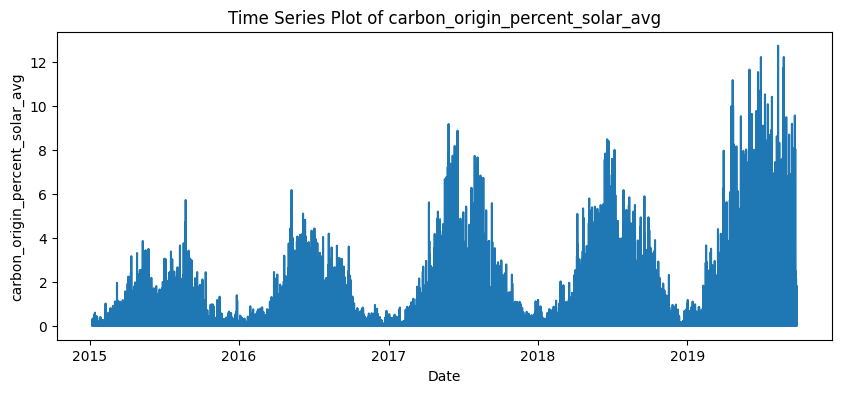

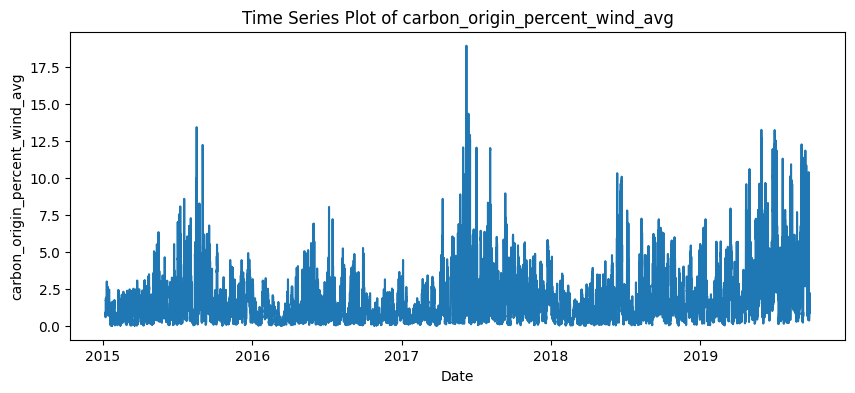

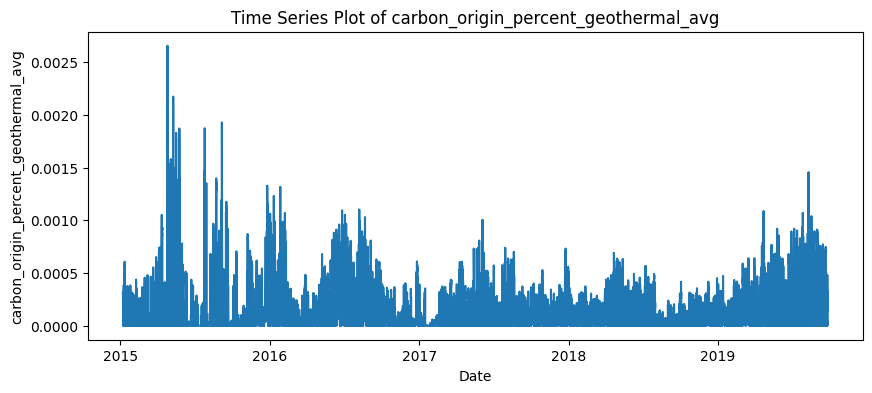

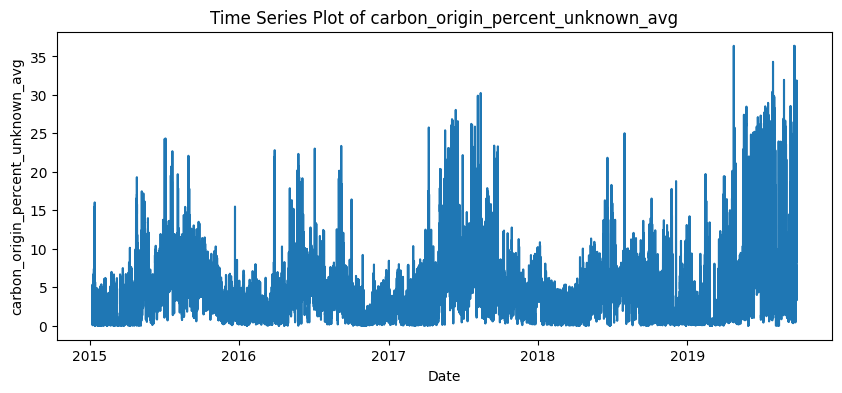

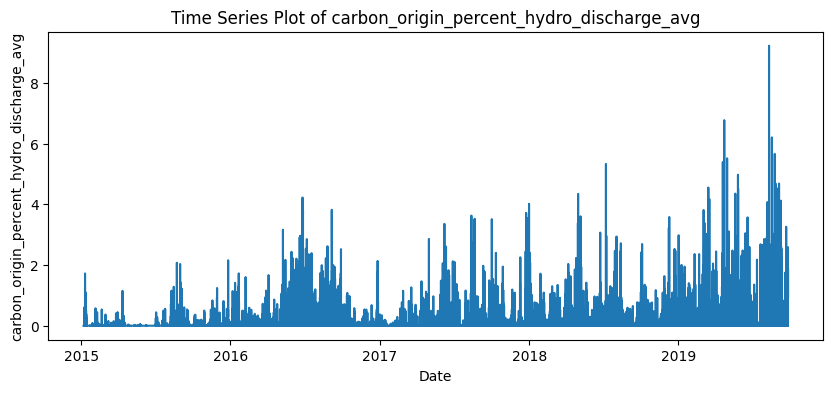

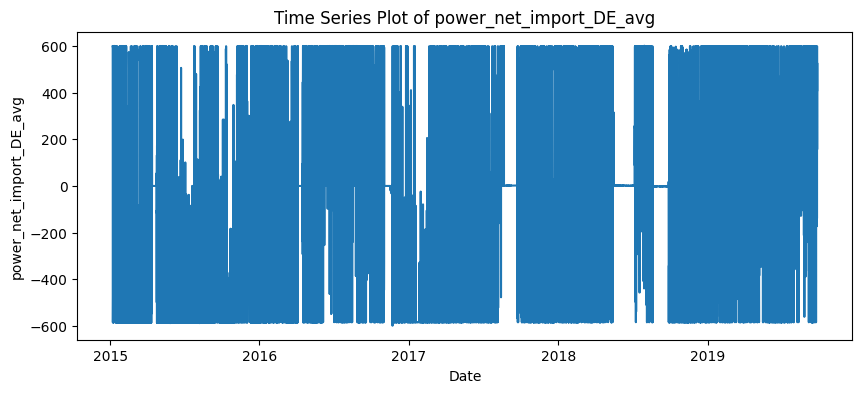

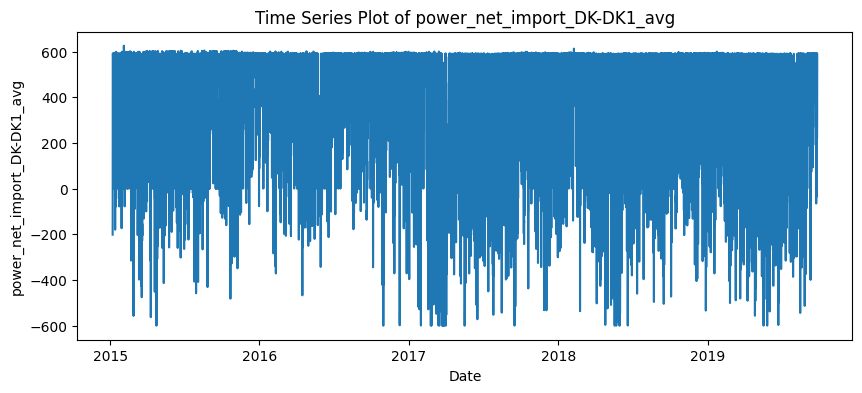

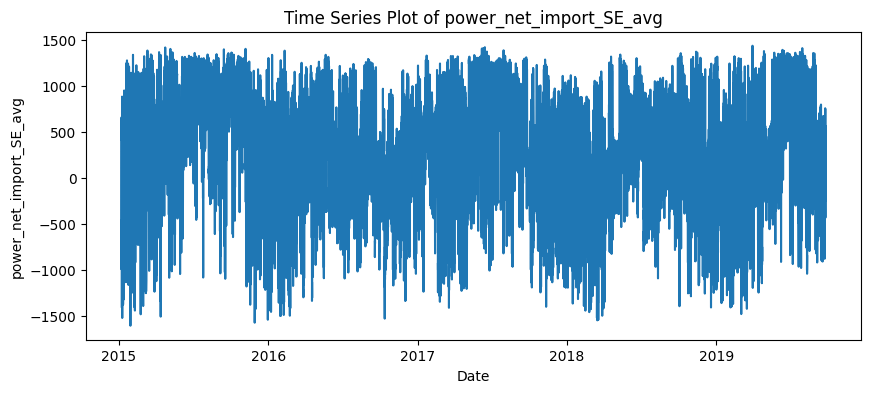

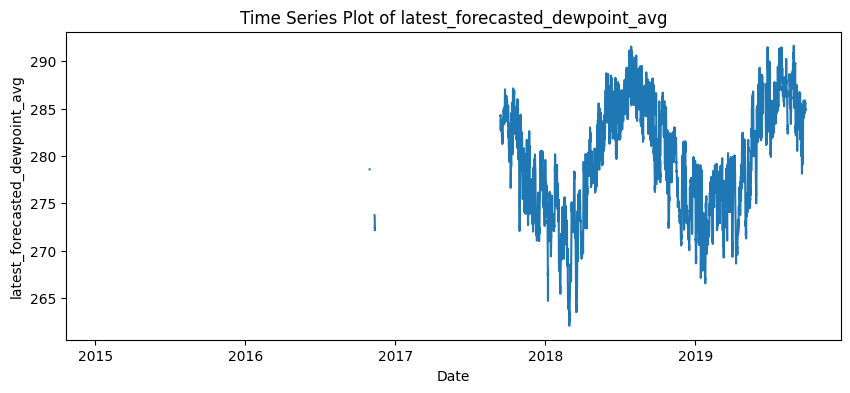

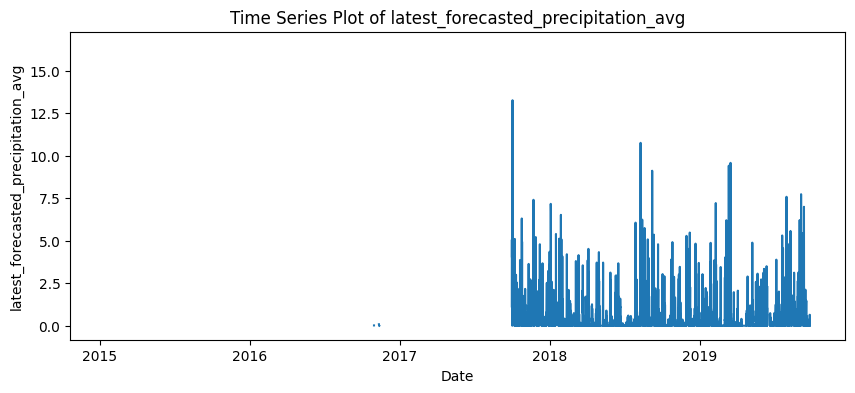

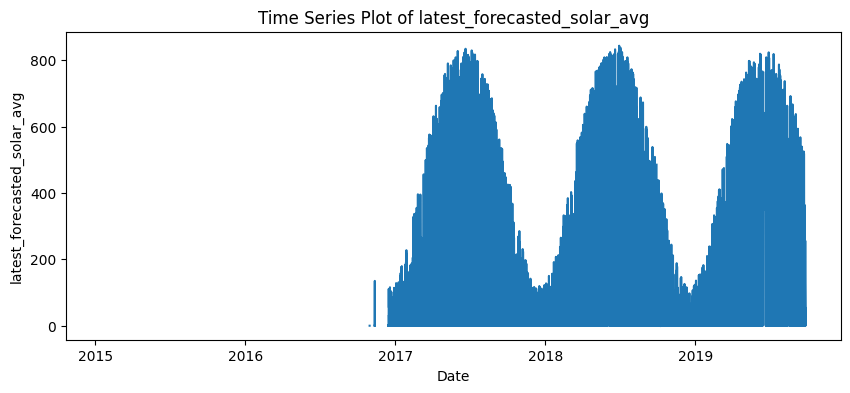

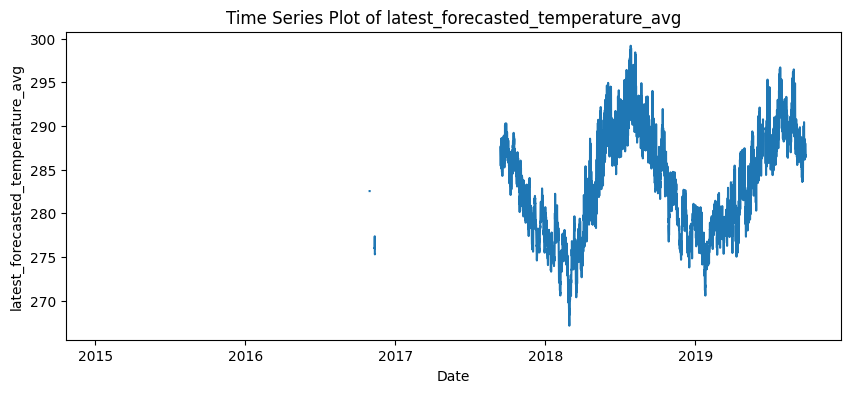

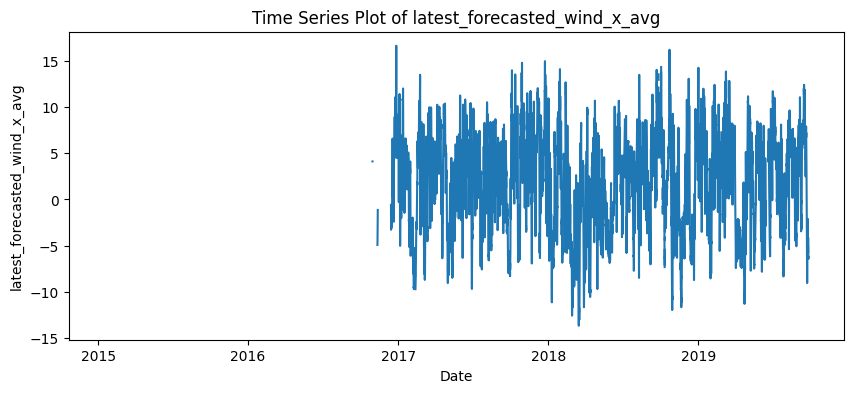

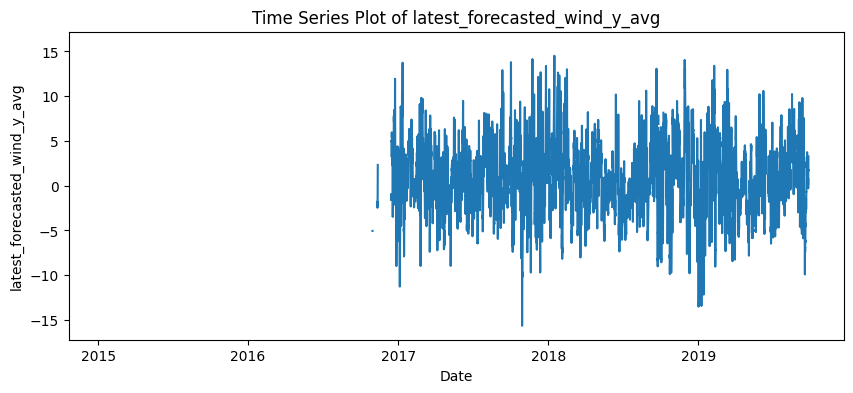

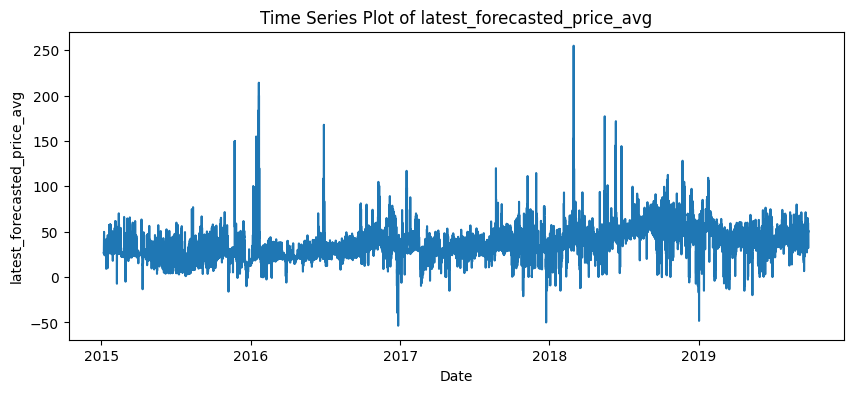

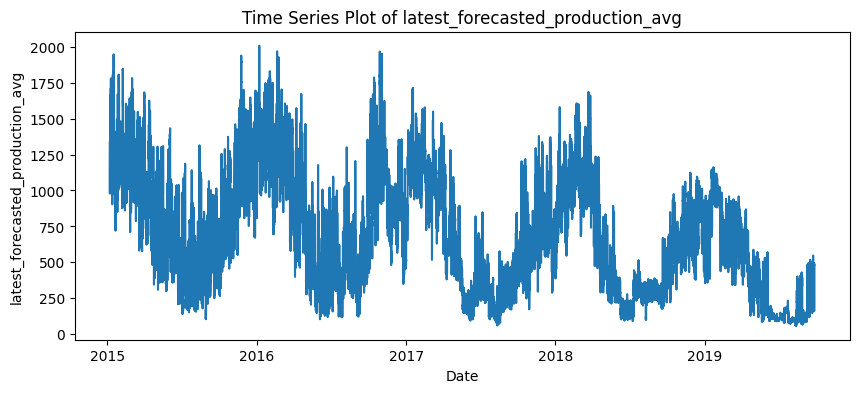

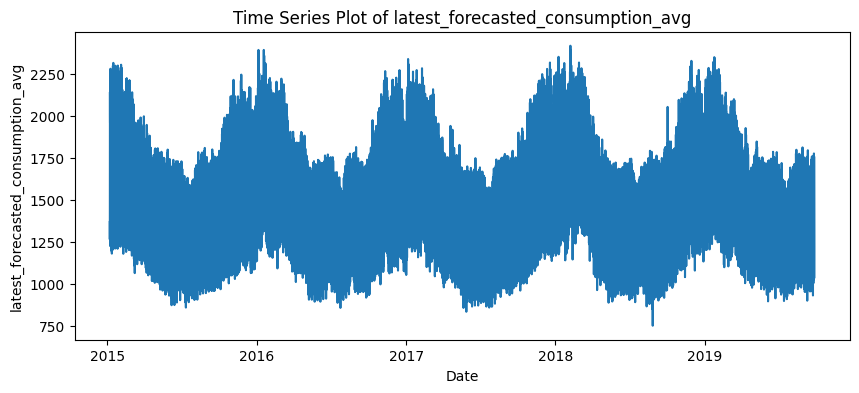

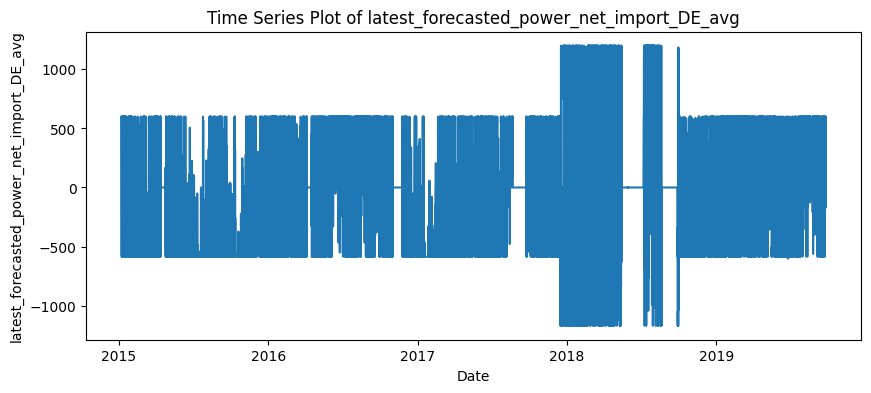

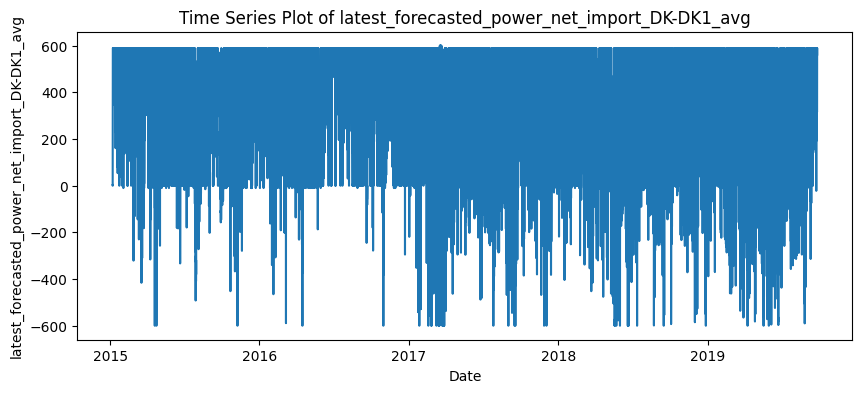

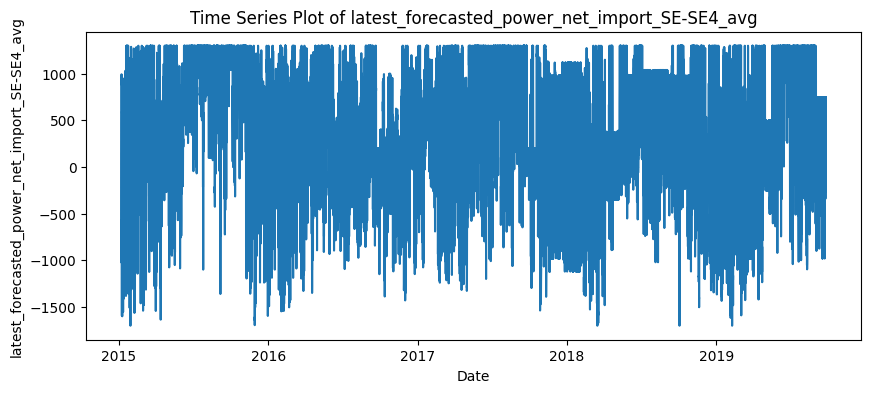

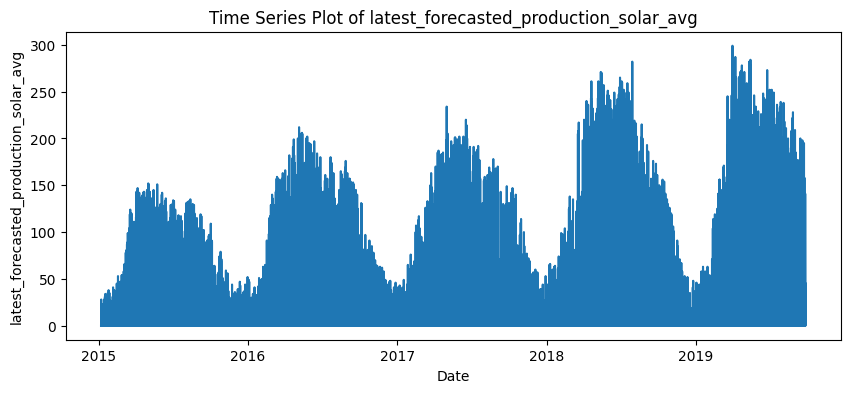

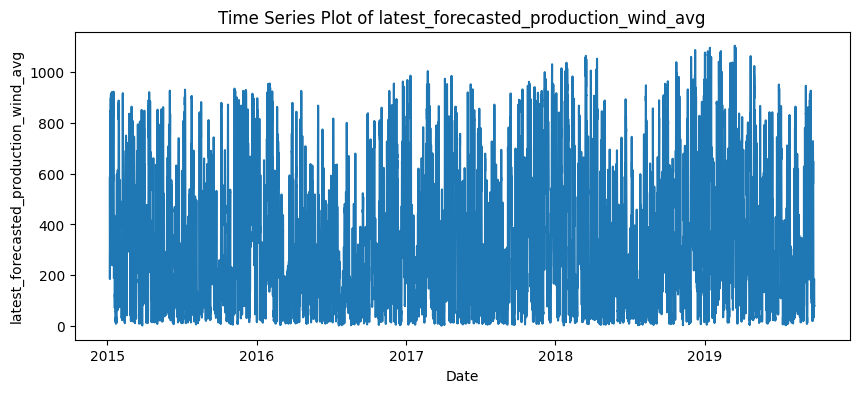

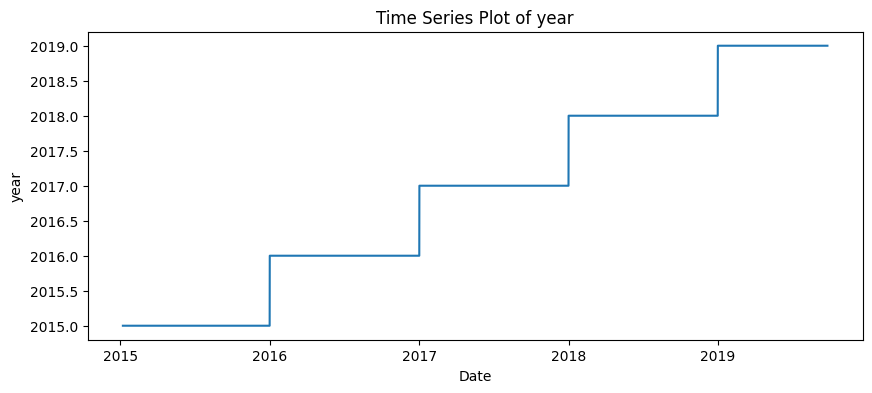

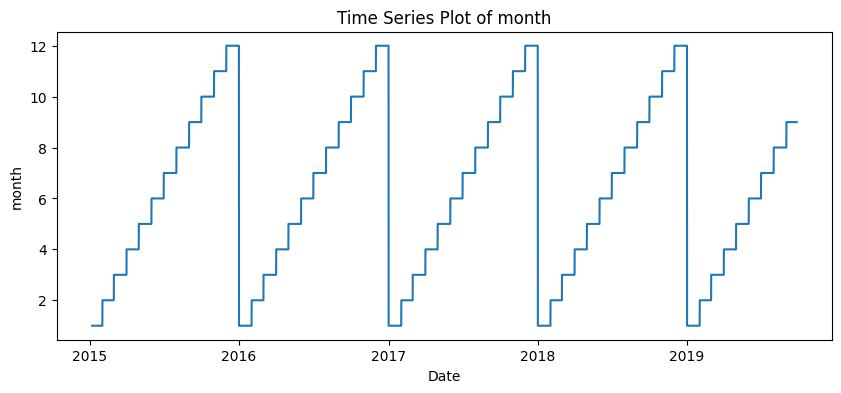

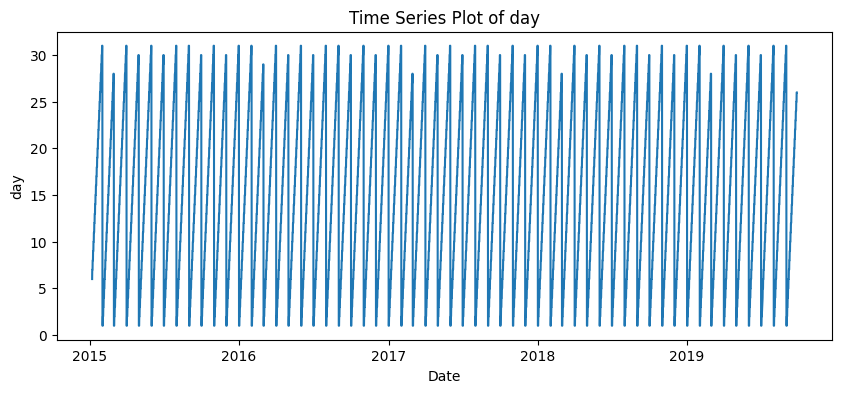

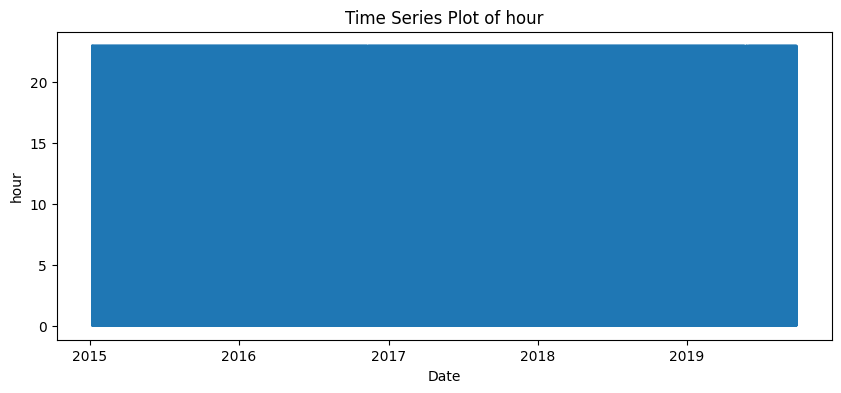

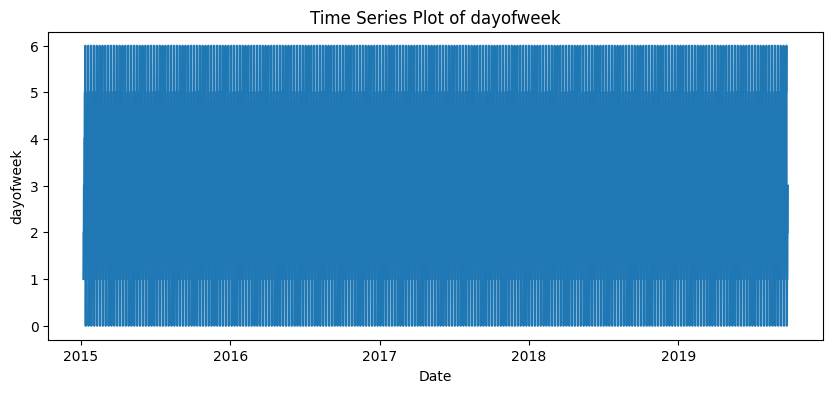

In [12]:
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    plt.plot(df['datetime'], df[feature])
    plt.title(f'Time Series Plot of {feature}')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.show()

In [13]:
# Identify outliers
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Flag outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    
    # Output information about the outliers
    print(f"Feature: {feature}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outliers:\n{outliers[feature]}")

Feature: carbon_intensity_production_avg
Number of outliers: 0
Outliers:
Series([], Name: carbon_intensity_production_avg, dtype: float64)
Feature: carbon_intensity_import_avg
Number of outliers: 283
Outliers:
1064     476.167544
1065     507.232095
1179     507.509575
1180     525.771366
1200     539.640580
            ...    
36325    483.558275
36326    481.688466
36327    489.320434
36332    488.856562
36333    475.960020
Name: carbon_intensity_import_avg, Length: 283, dtype: float64
Feature: carbon_rate_avg
Number of outliers: 501
Outliers:
1328     9.344400e+08
1329     9.896353e+08
1499     9.331376e+08
1505     9.326470e+08
1523     9.837603e+08
             ...     
28835    9.666402e+08
28836    9.651070e+08
28840    9.134487e+08
34720    9.716448e+08
34721    9.964546e+08
Name: carbon_rate_avg, Length: 501, dtype: float64
Feature: total_production_avg
Number of outliers: 20
Outliers:
27661    3720.0
28184    2395.0
28185    2385.0
28548    2320.0
28549    2321.0
28554    232

In [14]:
# Apply rolling mean smoothing
def apply_rolling_mean(df, numerical_features, window_size):
    for feature in numerical_features:
        df[f'mean_smoothed_{feature}'] = df[feature].rolling(window=window_size, center=True).mean()

# Apply rolling median smoothing
def apply_rolling_median(df, features, window_size):
    for feature in numerical_features:
        df[f'median_smoothed_{feature}'] = df[feature].rolling(window=window_size, center=True).median()

# Set window size
window_size = 5

# Apply both smoothing techniques
apply_rolling_mean(df, numerical_features, window_size)
apply_rolling_median(df, numerical_features, window_size)


C:\Users\adare\AppData\Local\Temp\ipykernel_18524\1373627323.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'median_smoothed_{feature}'] = df[feature].rolling(window=window_size, center=True).median()
C:\Users\adare\AppData\Local\Temp\ipykernel_18524\1373627323.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'median_smoothed_{feature}'] = df[feature].rolling(window=window_size, center=True).median()
C:\Users\adare\AppData\Local\Temp\ipykernel_18524\1373627323.py:9: PerformanceWarning: DataFrame is highly fragmen

In [15]:
def plot_comparison(df, feature):
    plt.figure(figsize=(14, 7))
    plt.plot(df['datetime'], df[feature], label='Original', alpha=0.5)
    plt.plot(df['datetime'], df[f'mean_smoothed_{feature}'], label='Mean Smoothed', alpha=0.8)
    plt.plot(df['datetime'], df[f'median_smoothed_{feature}'], label='Median Smoothed', alpha=0.8)
    plt.title(f'Time Series Plot of {feature}')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.show()


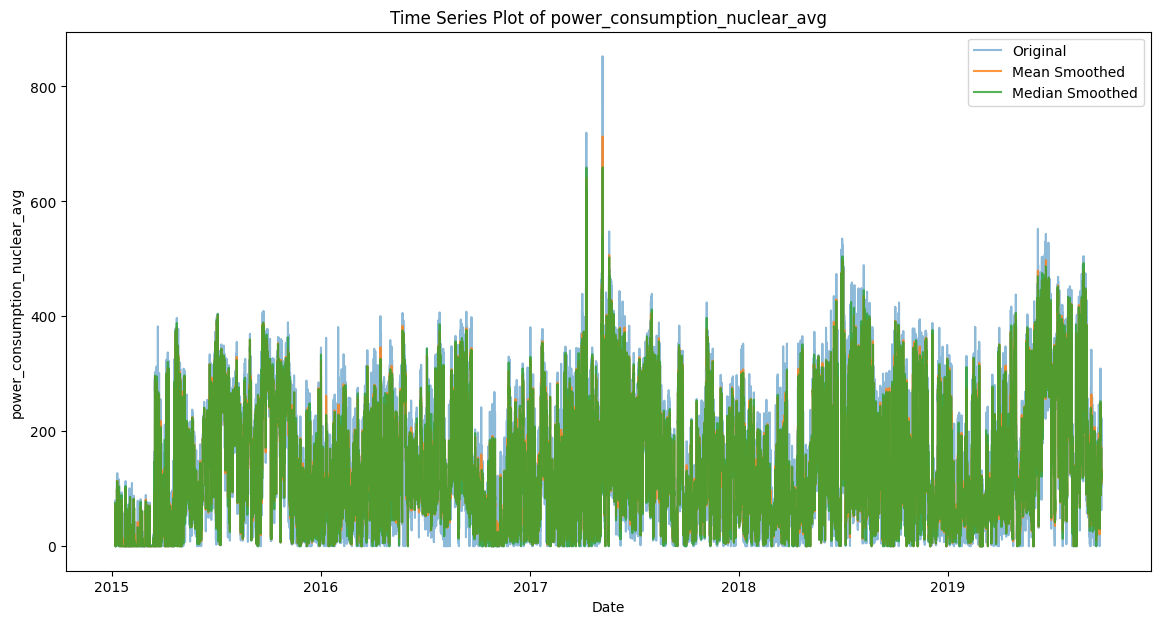

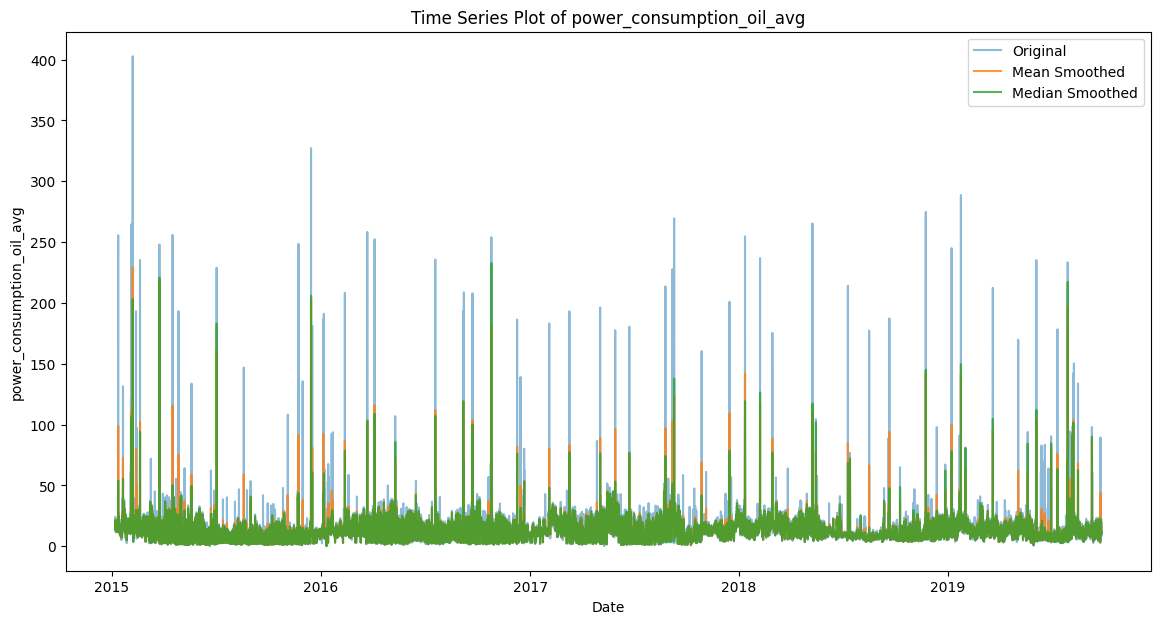

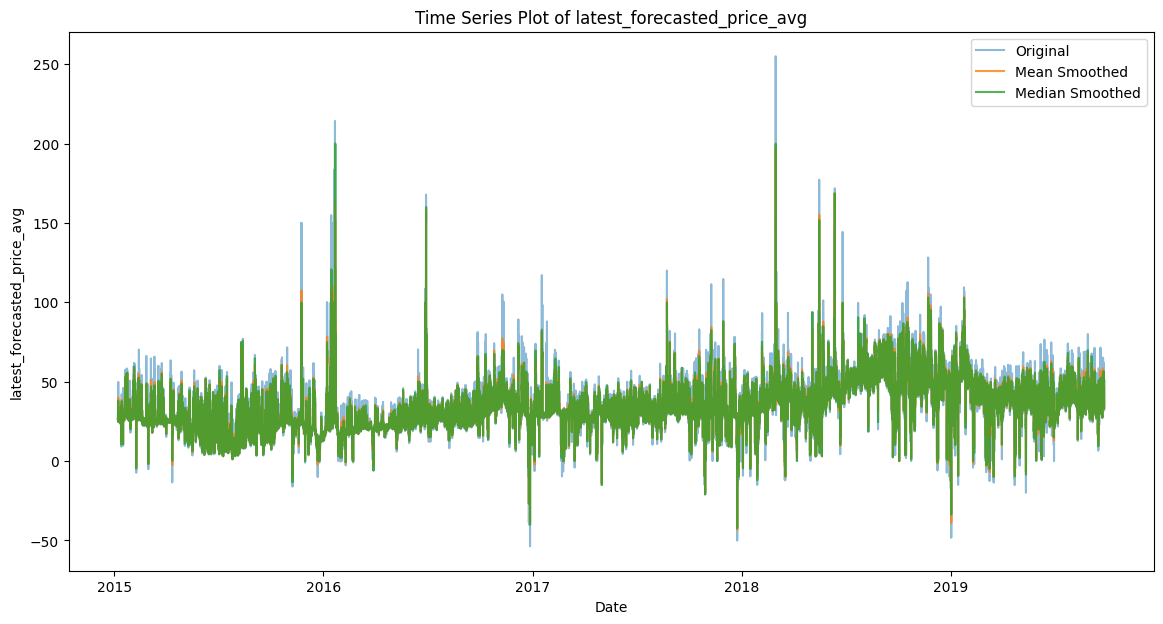

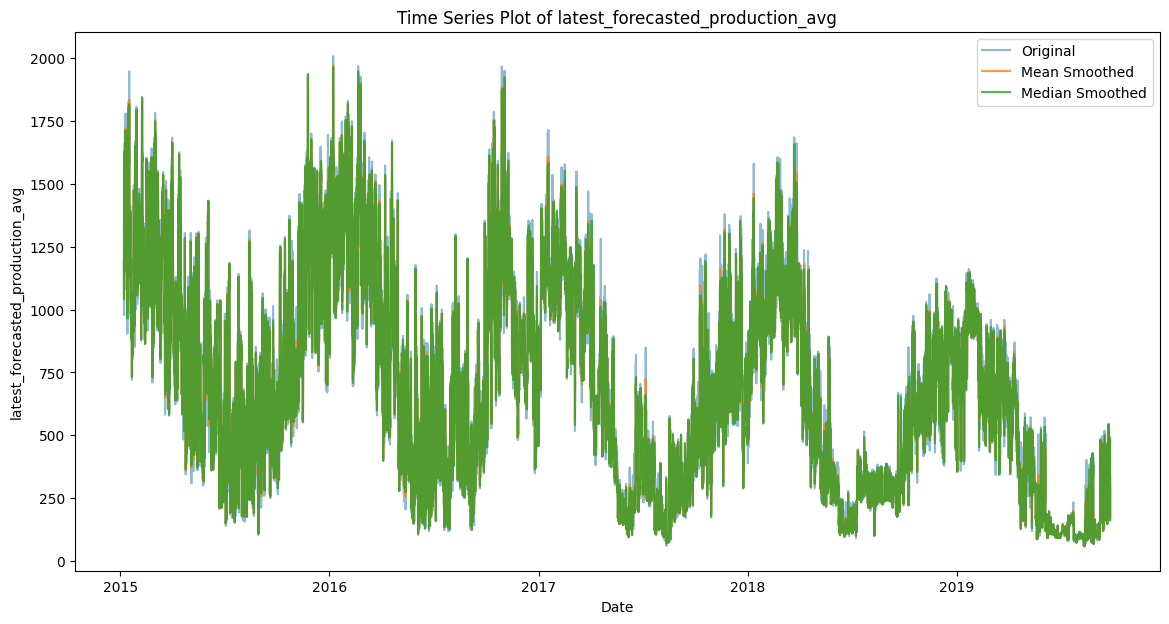

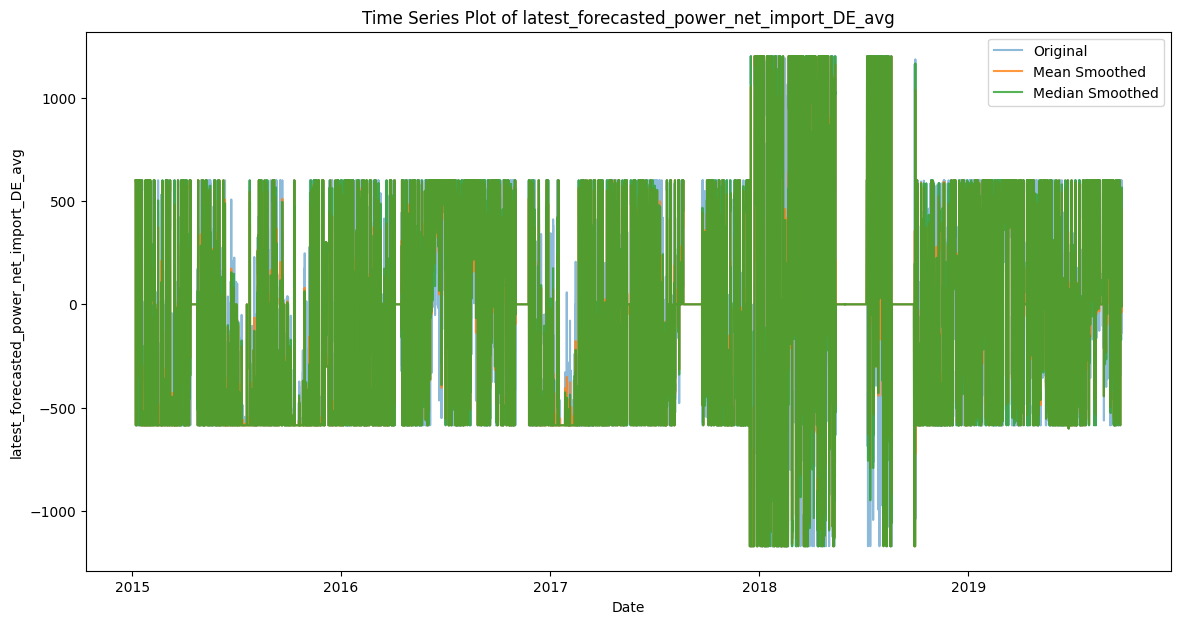

In [16]:
# List of features to visualize
features_to_visualize = ['power_consumption_nuclear_avg', 'power_consumption_oil_avg', 
                         'latest_forecasted_price_avg', 'latest_forecasted_production_avg', 
                         'latest_forecasted_power_net_import_DE_avg']

# Plot original, mean smoothed, and median smoothed features
for feature in features_to_visualize:
    plot_comparison(df, feature)


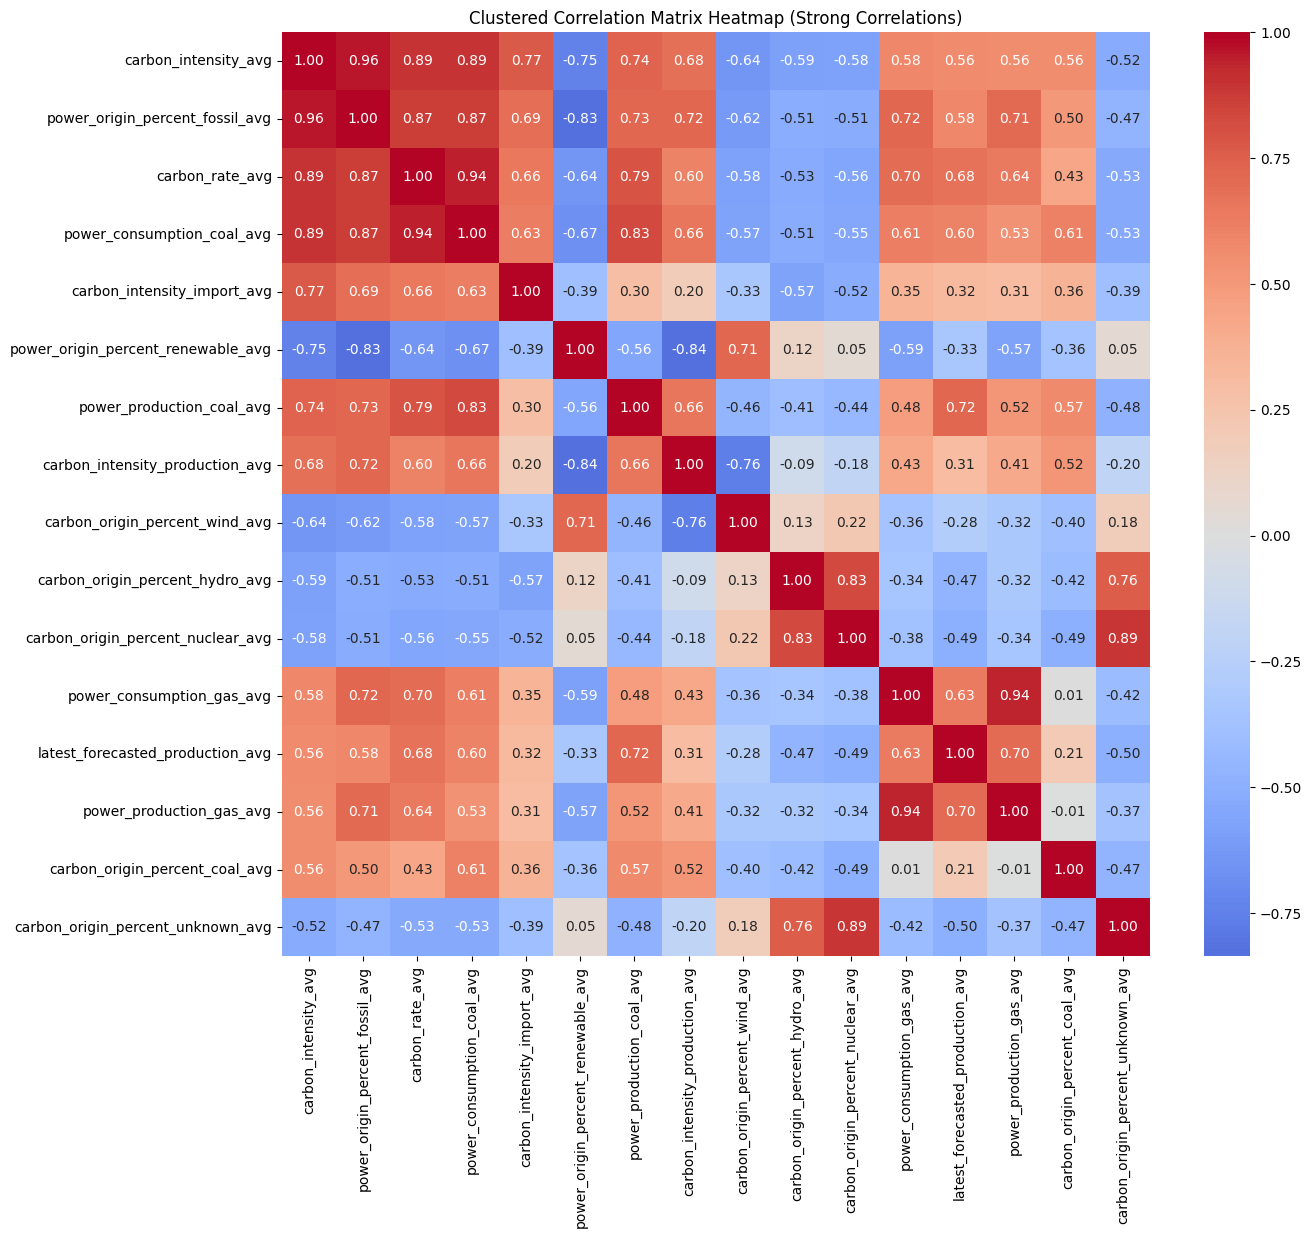

In [17]:
# Select the features to analyze
numerical_features.append('carbon_intensity_avg')
final_df = df[numerical_features]

# Compute the correlation matrix
correlation_matrix = final_df.corr()

# Filter for strong correlations with the target variable
target_correlation = correlation_matrix['carbon_intensity_avg'].abs().sort_values(ascending=False)
strong_corr_features = target_correlation[target_correlation > 0.5].index.tolist()

# Compute the correlation matrix for strong correlation features
strong_corr_matrix = final_df[strong_corr_features].corr()

# Plot the heatmap with increased font size
plt.figure(figsize=(14, 12))
sns.heatmap(strong_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, annot_kws={"size": 10})
plt.title('Clustered Correlation Matrix Heatmap (Strong Correlations)')
plt.show()

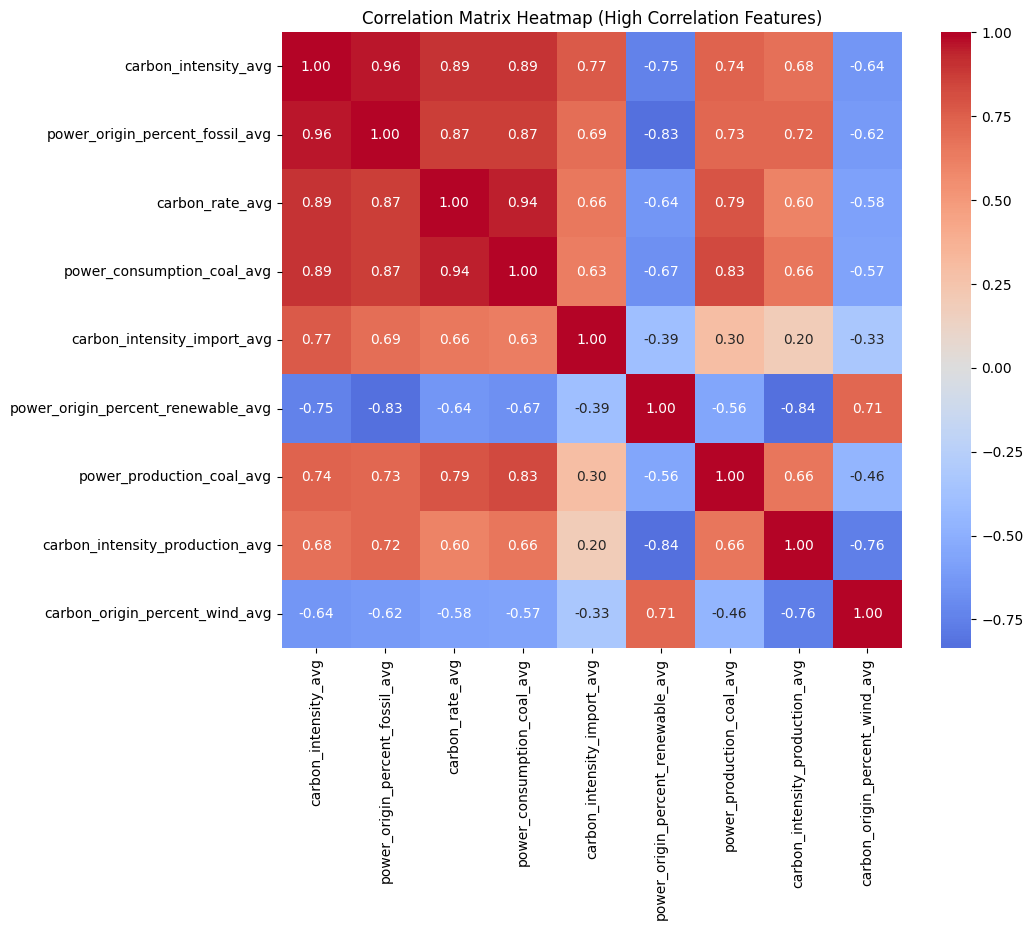

Selected Features: ['carbon_intensity_avg', 'carbon_intensity_import_avg', 'carbon_origin_percent_wind_avg']


In [18]:
# Compute the correlation matrix
correlation_matrix = final_df.corr()

# Compute correlations with the target variable
target_corr = correlation_matrix['carbon_intensity_avg'].abs().sort_values(ascending=False)

# Select features with high absolute correlation with the target variable (e.g., > 0.6)
high_corr_features = target_corr[target_corr > 0.6].index.tolist()

# Compute correlation matrix for the high correlation features
high_corr_matrix = final_df[high_corr_features].corr()

# Plot the heatmap for the high correlation features
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap (High Correlation Features)')
plt.show()

# Identify and remove features with high multicollinearity (pairwise correlation > 0.8)
def remove_multicollinear_features(corr_matrix, threshold=0.8):
    to_drop = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                if colname not in to_drop:
                    to_drop.append(colname)
    return to_drop

to_drop = remove_multicollinear_features(high_corr_matrix, threshold=0.8)
selected_features = [feature for feature in high_corr_features if feature not in to_drop]

# Final selected features
print("Selected Features:", selected_features)

C:\Users\adare\AppData\Local\Temp\ipykernel_18524\1982865556.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)
C:\Users\adare\AppData\Local\Temp\ipykernel_18524\1982865556.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)
C:\Users\adare\AppData\Local\Temp\ipykernel_18524\1982865556.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

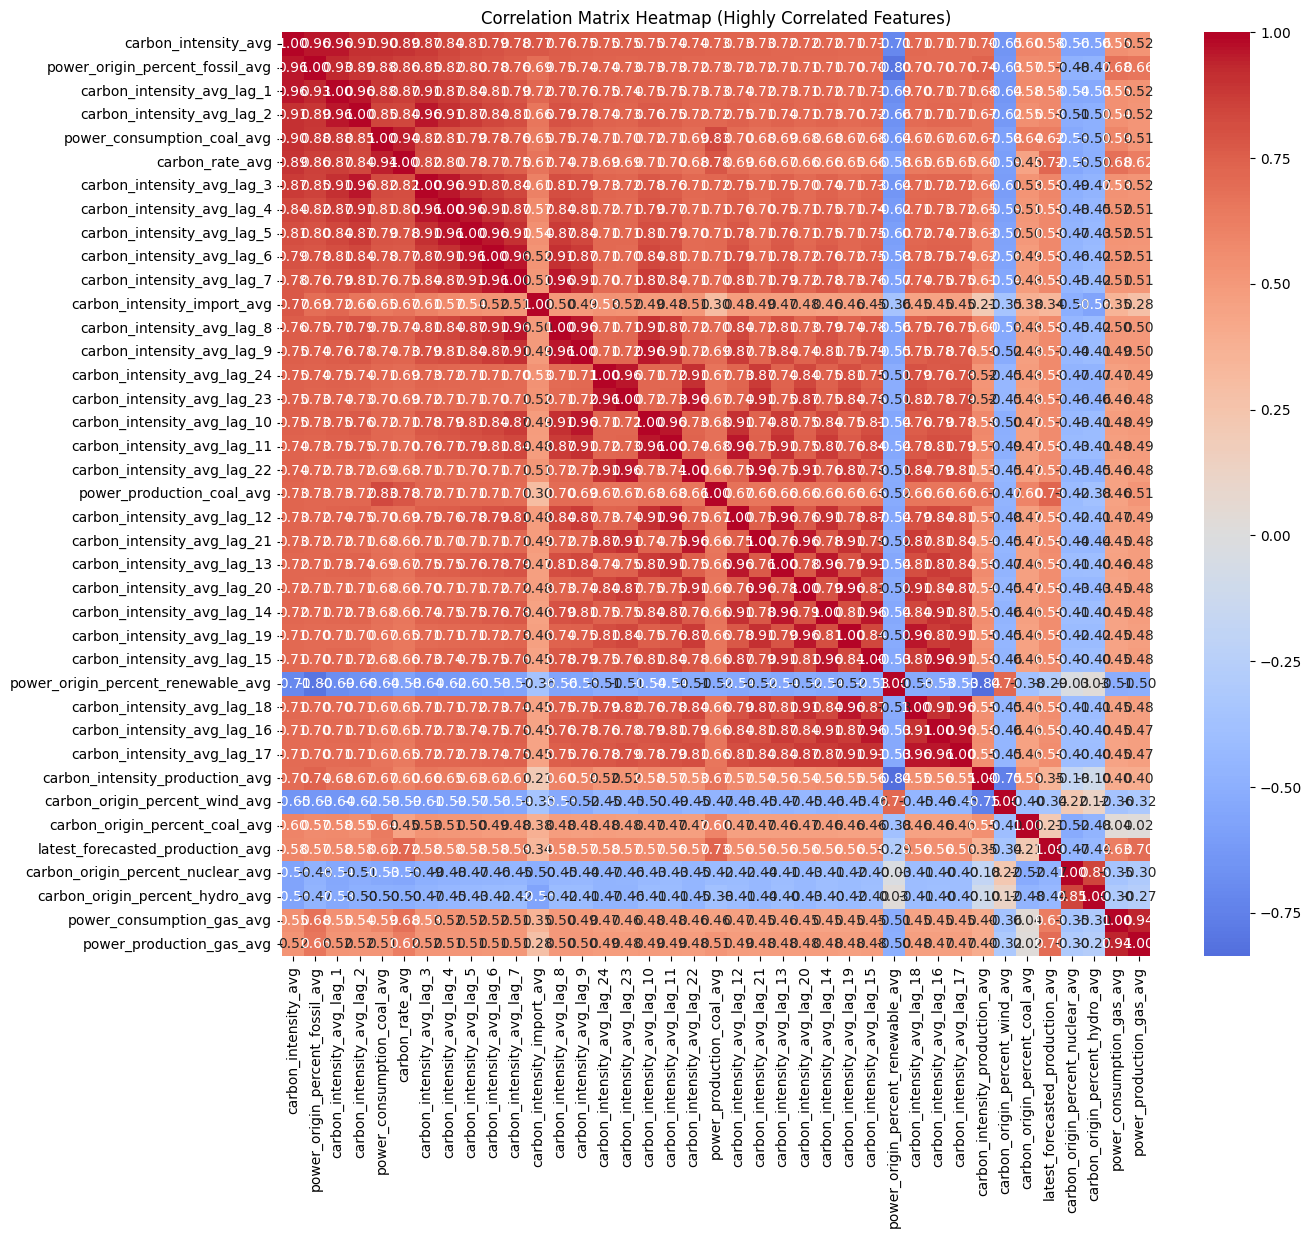

In [19]:
# Adding lag and time features
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek

# Create lag features
lag_features = ['carbon_intensity_avg']
for feature in lag_features:
    for lag in range(1, 25):
        df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)

# Ensure 'carbon_intensity_avg' is included in the feature list
if 'carbon_intensity_avg' not in numerical_features:
    numerical_features.append('carbon_intensity_avg')

# Include time and lag features in the features list
numerical_features.extend([f'{feature}_lag_{lag}' for feature in lag_features for lag in range(1, 25)])
numerical_features.extend(['year', 'month', 'day', 'hour', 'dayofweek'])

# Select the features to analyze, including 'carbon_intensity_avg'
final_df = df[numerical_features]

# Drop any rows with NaN values generated by lag features
final_df.dropna(inplace=True)

# Compute the correlation matrix
correlation_matrix = final_df.corr()

# Compute correlations with the target variable
target_corr = correlation_matrix['carbon_intensity_avg'].abs().sort_values(ascending=False)

# Select features with high absolute correlation with the target variable (e.g., > 0.5)
high_corr_features = target_corr[target_corr > 0.5].index.tolist()

# Compute correlation matrix for the high correlation features
high_corr_matrix = final_df[high_corr_features].corr()

# Plot the heatmap for the high correlation features
plt.figure(figsize=(14, 12))
sns.heatmap(high_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap (Highly Correlated Features)')
plt.show()

In [20]:
# Selected features
selected_features = [
    'carbon_intensity_avg_lag_1',
    'carbon_intensity_avg_lag_24',
    'power_origin_percent_fossil_avg',
    'carbon_rate_avg',
    'power_consumption_coal_avg',
    'power_origin_percent_renewable_avg',
    'carbon_intensity_import_avg',
    'carbon_intensity_avg'
]

# Create a new DataFrame with selected features
final_df = df[selected_features].copy()

# Generate interaction features
interaction_features = [
    'power_origin_percent_fossil_avg', 
    'carbon_rate_avg', 
    'power_consumption_coal_avg', 
    'power_origin_percent_renewable_avg'
]

# Create interaction terms by multiplying pairs of features
for feature1, feature2 in combinations(interaction_features, 2):
    interaction_term_name = f'{feature1}_x_{feature2}'
    final_df[interaction_term_name] = final_df[feature1] * final_df[feature2]

# List the columns to verify
print(final_df.columns)

# Example of a few new interaction terms to check
print(final_df.head())

Index(['carbon_intensity_avg_lag_1', 'carbon_intensity_avg_lag_24',
       'power_origin_percent_fossil_avg', 'carbon_rate_avg',
       'power_consumption_coal_avg', 'power_origin_percent_renewable_avg',
       'carbon_intensity_import_avg', 'carbon_intensity_avg',
       'power_origin_percent_fossil_avg_x_carbon_rate_avg',
       'power_origin_percent_fossil_avg_x_power_consumption_coal_avg',
       'power_origin_percent_fossil_avg_x_power_origin_percent_renewable_avg',
       'carbon_rate_avg_x_power_consumption_coal_avg',
       'carbon_rate_avg_x_power_origin_percent_renewable_avg',
       'power_consumption_coal_avg_x_power_origin_percent_renewable_avg'],
      dtype='object')
     carbon_intensity_avg_lag_1  carbon_intensity_avg_lag_24  \
624                         NaN                          NaN   
625                  417.740436                          NaN   
626                  422.300334                          NaN   
627                  425.887776                      

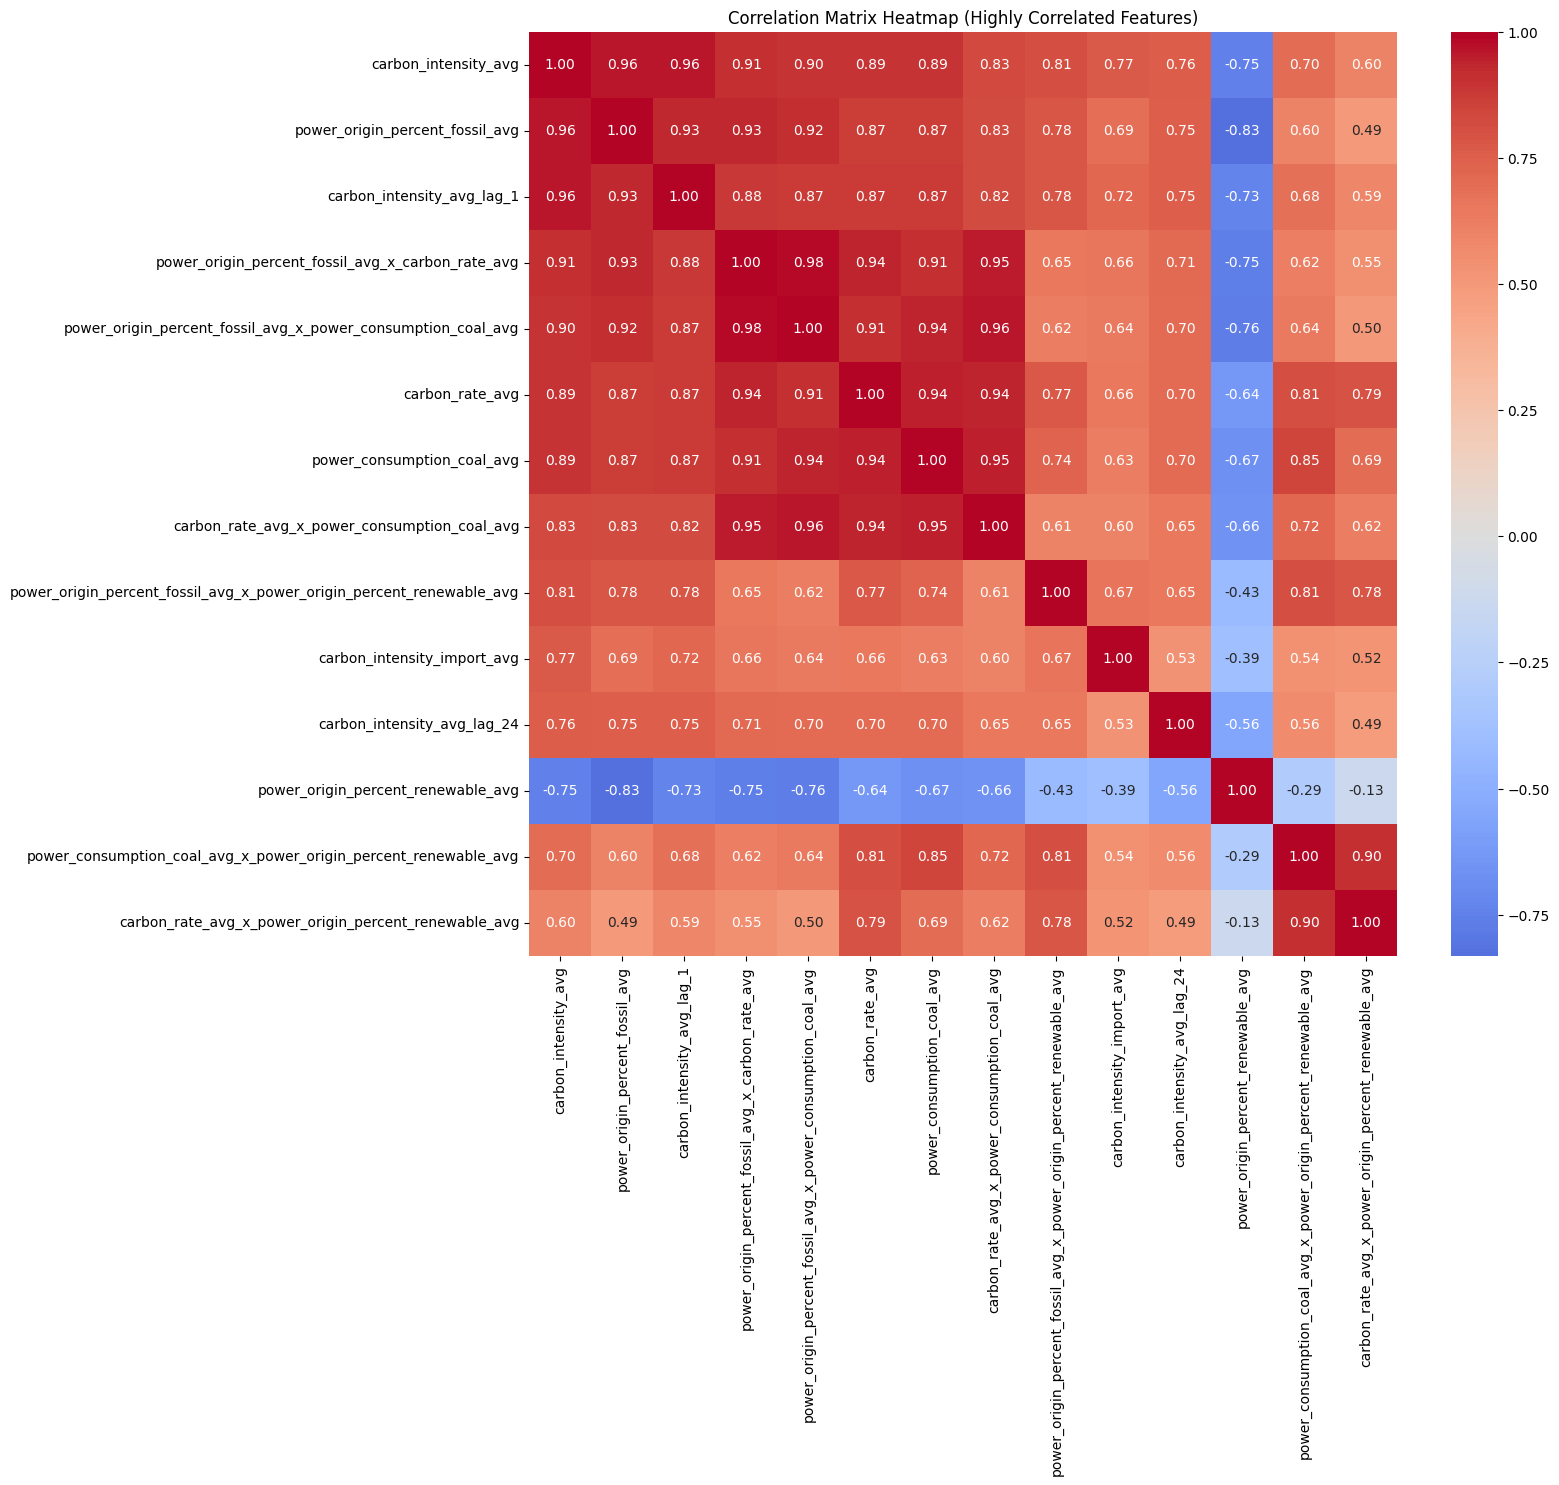

Selected Features with High Correlation to Target Variable:
['carbon_intensity_avg', 'power_origin_percent_fossil_avg', 'carbon_intensity_avg_lag_1', 'power_origin_percent_fossil_avg_x_carbon_rate_avg', 'power_origin_percent_fossil_avg_x_power_consumption_coal_avg', 'carbon_rate_avg', 'power_consumption_coal_avg', 'carbon_rate_avg_x_power_consumption_coal_avg', 'power_origin_percent_fossil_avg_x_power_origin_percent_renewable_avg', 'carbon_intensity_import_avg', 'carbon_intensity_avg_lag_24', 'power_origin_percent_renewable_avg', 'power_consumption_coal_avg_x_power_origin_percent_renewable_avg', 'carbon_rate_avg_x_power_origin_percent_renewable_avg']


In [21]:
# Compute the correlation matrix
correlation_matrix = final_df.corr()

# Compute correlations with the target variable
target_corr = correlation_matrix['carbon_intensity_avg'].abs().sort_values(ascending=False)

# Select features with high absolute correlation with the target variable (e.g., > 0.5)
high_corr_features = target_corr[target_corr > 0.5].index.tolist()

# Compute correlation matrix for the high correlation features
high_corr_matrix = final_df[high_corr_features].corr()

# Plot the heatmap for the high correlation features
plt.figure(figsize=(14, 12))
sns.heatmap(high_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap (Highly Correlated Features)')
plt.show()

# List of features with high correlation to the target variable
print("Selected Features with High Correlation to Target Variable:")
print(high_corr_features)
